In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [2]:
df = pd.read_csv(r"C:\Users\sures\OneDrive\Desktop\from_tuf_gaming\Household_Energy_Usage_Forecast\power_consumption_dataset\household_energy_data.csv")
df

C:\Users\sures\AppData\Local\Temp\ipykernel_22740\393923388.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\sures\OneDrive\Desktop\from_tuf_gaming\Household_Energy_Usage_Forecast\power_consumption_dataset\household_energy_data.csv")


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [3]:
# know the units and description before going further
# Global_active_power: kilowatt
# Global_reactive_power: kilowatt
# Voltage: volt
# Global_intensity: ampere 
# Sub_metering_1: watt-hour of active energy
# Sub_metering_2: watt-hour of active energy
# Sub_metering_3: watt-hour of active energy
# Sub_metering_1: It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
# Sub_metering_2: It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
# Sub_metering_3: It corresponds to an electric water-heater and an air-conditioner.
# Sub_metering_4: not specified, its the remaining energy consumption in the house other than the three sub metering,
# it is the remaing unmeasured active energy of global active energy calculated by subtracting the sum of the three sub metering from the global active energy.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [5]:
# change date column to date data type
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

# Convert numeric columns to appropriate data types
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

df.info()
print(type(df['Time'].iloc[0]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 142.5+ MB
<class 'datetime.time'>


In [6]:
# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract date/time features
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekday'] = df['Date'].dt.dayofweek
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
# df['Minute'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.minute
# create a datetime index
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
df.set_index('Datetime', inplace=True)


df.shape

(2075259, 14)

In [7]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day,Month,Year,Weekday,Hour
Datetime,,,,,,,,,,,,,,
2006-12-16 17:24:00,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,16,12,2006,5,17
2006-12-16 17:25:00,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,16,12,2006,5,17
2006-12-16 17:26:00,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,16,12,2006,5,17
2006-12-16 17:27:00,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,16,12,2006,5,17
2006-12-16 17:28:00,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,16,12,2006,5,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,2010-11-26,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,26,11,2010,4,20
2010-11-26 20:59:00,2010-11-26,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,26,11,2010,4,20
2010-11-26 21:00:00,2010-11-26,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,26,11,2010,4,21


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   Day                    int32         
 10  Month                  int32         
 11  Year                   int32         
 12  Weekday                int32         
 13  Hour                   int32         
dtypes: datetime64[ns](1), float64(7), int32(5), object(1)
memory usage: 197.9+ MB


In [9]:
# Check for missing values in the dataset for the date 2007-04-28 based on the information provided
missing_values_april_28 = df[(df['Date'] == pd.to_datetime('2007-04-28')) & (df.isnull().any(axis=1))]
missing_values_april_28

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day,Month,Year,Weekday,Hour
Datetime,,,,,,,,,,,,,,
2007-04-28 00:21:00,2007-04-28,00:21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,4,2007,5,0
2007-04-28 00:22:00,2007-04-28,00:22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,4,2007,5,0
2007-04-28 00:23:00,2007-04-28,00:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,4,2007,5,0
2007-04-28 00:24:00,2007-04-28,00:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,4,2007,5,0
2007-04-28 00:25:00,2007-04-28,00:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,4,2007,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-04-28 23:55:00,2007-04-28,23:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,4,2007,5,23
2007-04-28 23:56:00,2007-04-28,23:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,4,2007,5,23
2007-04-28 23:57:00,2007-04-28,23:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,4,2007,5,23


In [10]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Day                          0
Month                        0
Year                         0
Weekday                      0
Hour                         0
dtype: int64

In [11]:
# Calculate the mean for each hour for numeric columns

numeric_columns.append('Sub_metering_3')

hourly_means = df.groupby('Hour')[numeric_columns].transform('mean')

# Fill NaN values with the hourly mean
df[numeric_columns] = df[numeric_columns].fillna(hourly_means)

In [12]:
hourly_mean_24 = df.groupby('Hour')[numeric_columns].mean()
display(hourly_mean_24)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Hour,,,,,,,
0,0.659434,0.114974,242.401809,2.806901,0.364378,0.555392,2.966651
1,0.539325,0.104968,241.719412,2.312065,0.248958,0.397963,2.351931
2,0.480621,0.105100,242.592898,2.064921,0.145858,0.350133,2.027166
3,0.444866,0.103050,242.684657,1.917526,0.067765,0.350061,1.692080
4,0.443847,0.099586,242.427262,1.911879,0.047142,0.334048,1.866275
5,0.453674,0.096942,242.094522,1.949221,0.035703,0.315693,2.135749
6,0.791600,0.102699,241.941153,3.369913,0.039433,0.334299,4.236972
7,1.502246,0.109976,239.924560,6.323800,0.305204,0.503084,10.743926
8,1.461016,0.110831,239.504684,6.140271,1.371780,1.009836,12.657799


In [13]:
df[df['Date'].dt.date == pd.to_datetime('2007-04-28').date()]
#checking the data for 2007-04-28 for validation

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day,Month,Year,Weekday,Hour
Datetime,,,,,,,,,,,,,,
2007-04-28 00:00:00,2007-04-28,00:00:00,1.368000,0.086000,233.050000,5.800000,0.000000,1.000000,0.000000,28,4,2007,5,0
2007-04-28 00:01:00,2007-04-28,00:01:00,1.370000,0.086000,233.220000,5.800000,0.000000,1.000000,0.000000,28,4,2007,5,0
2007-04-28 00:02:00,2007-04-28,00:02:00,1.372000,0.088000,233.570000,5.800000,0.000000,2.000000,0.000000,28,4,2007,5,0
2007-04-28 00:03:00,2007-04-28,00:03:00,1.370000,0.086000,233.400000,5.800000,0.000000,1.000000,0.000000,28,4,2007,5,0
2007-04-28 00:04:00,2007-04-28,00:04:00,1.368000,0.086000,233.250000,5.800000,0.000000,1.000000,0.000000,28,4,2007,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-04-28 23:55:00,2007-04-28,23:55:00,0.902142,0.119445,243.024427,3.791295,0.957796,0.831428,4.010437,28,4,2007,5,23
2007-04-28 23:56:00,2007-04-28,23:56:00,0.902142,0.119445,243.024427,3.791295,0.957796,0.831428,4.010437,28,4,2007,5,23
2007-04-28 23:57:00,2007-04-28,23:57:00,0.902142,0.119445,243.024427,3.791295,0.957796,0.831428,4.010437,28,4,2007,5,23


In [14]:
df.isnull().sum()
# Check for missing values in the dataset for the date 2007-04-28 after filling 

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Day                      0
Month                    0
Year                     0
Weekday                  0
Hour                     0
dtype: int64

In [15]:
df.duplicated().sum()
# Check for duplicate rows

np.int64(0)

In [16]:
unique_values = df.nunique()
print(unique_values)

Date                     1442
Time                     1440
Global_active_power      4210
Global_reactive_power     556
Voltage                  2861
Global_intensity          245
Sub_metering_1            112
Sub_metering_2            105
Sub_metering_3             56
Day                        31
Month                      12
Year                        5
Weekday                     7
Hour                       24
dtype: int64


In [17]:
df.describe()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day,Month,Year,Weekday,Hour
count,2075259,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,2008-12-05 19:13:27.255191040,1.091518e+00,1.237065e-01,2.408396e+02,4.627353e+00,1.121476e+00,1.298513e+00,6.459705e+00,1.577363e+01,6.450359e+00,2.008437e+03,2.998909e+00,1.150076e+01
min,2006-12-16 00:00:00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.006000e+03,0.000000e+00,0.000000e+00
25%,2007-12-12 00:00:00,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,3.000000e+00,2.007000e+03,1.000000e+00,6.000000e+00
50%,2008-12-06 00:00:00,6.180000e-01,1.020000e-01,2.410000e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.600000e+01,6.000000e+00,2.008000e+03,3.000000e+00,1.200000e+01
75%,2009-12-01 00:00:00,1.524000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2.300000e+01,9.000000e+00,2.009000e+03,5.000000e+00,1.800000e+01
max,2010-11-26 00:00:00,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,3.100000e+01,1.200000e+01,2.010000e+03,6.000000e+00,2.300000e+01
std,NaN,1.051729e+00,1.120359e-01,3.223197e+00,4.421004e+00,6.115107e+00,5.786086e+00,8.393021e+00,8.787773e+00,3.415762e+00,1.128677e+00,2.000064e+00,6.922227e+00


In [18]:


# # Resample with correct aggregation rules
# df_hourly = df.resample('H').agg({
#     'Global_active_power': 'mean',         # kWh
#     'Global_reactive_power': 'mean',       # kWh
#     'Voltage': 'mean',                     # V
#     'Global_intensity': 'mean',            # A
#     'Sub_metering_1': 'sum',               # Wh
#     'Sub_metering_2': 'sum',               # Wh
#     'Sub_metering_3': 'sum'                # Wh
# })

# # Convert sub-metering to kWh
# df_hourly['Sub_metering_1_kWh'] = df_hourly['Sub_metering_1'] / 1000   # kWh
# df_hourly['Sub_metering_2_kWh'] = df_hourly['Sub_metering_2'] / 1000   # kWh
# df_hourly['Sub_metering_3_kWh'] = df_hourly['Sub_metering_3'] / 1000   # kWh

# # Compute energy from power (already mean per minute → so multiply by 1 hour)


# # Compute "Other" unmetered energy
# df_hourly['Other_energy_kWh'] = (
#     df_hourly['Global_active_power']
#     - df_hourly['Sub_metering_1_kWh']
#     - df_hourly['Sub_metering_2_kWh']
#     - df_hourly['Sub_metering_3_kWh']
# )

# # Restore datetime components
# df_hourly['Day'] = df_hourly.index.day
# df_hourly['Month'] = df_hourly.index.month
# df_hourly['Year'] = df_hourly.index.year
# df_hourly['Weekday'] = df_hourly.index.weekday
# df_hourly['Hour'] = df_hourly.index.hour

# # Optional: drop original Wh columns if you now use the kWh versions
# # df_hourly.drop(columns=['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], inplace=True)


In [19]:
# df = df_hourly.copy()
# display(df)
# df.info()

In [20]:
# we divide the Sub_metering values by 60 and then by 1000, or simply by 60000.
# we converting from Wh to kW 
df['Sub_metering_1'] = df['Sub_metering_1'] / 60000
df['Sub_metering_2'] = df['Sub_metering_2'] / 60000
df['Sub_metering_3'] = df['Sub_metering_3'] / 60000

df['Other_power'] = df['Global_active_power'] - (df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3'])

df.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day,Month,Year,Weekday,Hour,Other_power
Datetime,,,,,,,,,,,,,,,
2006-12-16 17:24:00,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,0.000017,0.000283,16,12,2006,5,17,4.215700
2006-12-16 17:25:00,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,0.000017,0.000267,16,12,2006,5,17,5.359717
2006-12-16 17:26:00,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,0.000033,0.000283,16,12,2006,5,17,5.373683
2006-12-16 17:27:00,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,0.000017,0.000283,16,12,2006,5,17,5.387700
2006-12-16 17:28:00,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,0.000017,0.000283,16,12,2006,5,17,3.665700


In [21]:
df['Apparent_power'] = np.sqrt(df['Global_active_power']**2 + df['Global_reactive_power']**2)

In [22]:
# Reorder the columns to place 'Other_power' after 'Sub_metering_3' and 'Apparent_power' after 'Other_power'
cols = list(df.columns)
# Remove the columns to reposition
other_power_col = cols.pop(cols.index('Other_power'))
apparent_power_col = cols.pop(cols.index('Apparent_power'))
sub_metering_3_index = cols.index('Sub_metering_3')
# Insert 'Other_power' after 'Sub_metering_3'
cols.insert(sub_metering_3_index + 1, other_power_col)
# Insert 'Apparent_power' after 'Other_power'
other_power_index = cols.index('Other_power')
cols.insert(other_power_index + 1, apparent_power_col)

# Reorder the DataFrame columns
df = df[cols]

In [23]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Other_power,Apparent_power,Day,Month,Year,Weekday,Hour
Datetime,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,0.000017,0.000283,4.215700,4.236671,16,12,2006,5,17
2006-12-16 17:25:00,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,0.000017,0.000267,5.359717,5.377704,16,12,2006,5,17
2006-12-16 17:26:00,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,0.000033,0.000283,5.373683,5.397025,16,12,2006,5,17
2006-12-16 17:27:00,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,0.000017,0.000283,5.387700,5.411335,16,12,2006,5,17
2006-12-16 17:28:00,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,0.000017,0.000283,3.665700,3.703828,16,12,2006,5,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,2010-11-26,20:58:00,0.946,0.000,240.43,4.0,0.0,0.000000,0.000000,0.946000,0.946000,26,11,2010,4,20
2010-11-26 20:59:00,2010-11-26,20:59:00,0.944,0.000,240.00,4.0,0.0,0.000000,0.000000,0.944000,0.944000,26,11,2010,4,20
2010-11-26 21:00:00,2010-11-26,21:00:00,0.938,0.000,239.82,3.8,0.0,0.000000,0.000000,0.938000,0.938000,26,11,2010,4,21


In [24]:
df[df['Other_power'] < 0]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Other_power,Apparent_power,Day,Month,Year,Weekday,Hour
Datetime,,,,,,,,,,,,,,,,


In [25]:
df = df.drop(columns=['Date', 'Time'])
df = df.resample('h').mean()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34589 entries, 2006-12-16 17:00:00 to 2010-11-26 21:00:00
Freq: h
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    34589 non-null  float64
 1   Global_reactive_power  34589 non-null  float64
 2   Voltage                34589 non-null  float64
 3   Global_intensity       34589 non-null  float64
 4   Sub_metering_1         34589 non-null  float64
 5   Sub_metering_2         34589 non-null  float64
 6   Sub_metering_3         34589 non-null  float64
 7   Other_power            34589 non-null  float64
 8   Apparent_power         34589 non-null  float64
 9   Day                    34589 non-null  float64
 10  Month                  34589 non-null  float64
 11  Year                   34589 non-null  float64
 12  Weekday                34589 non-null  float64
 13  Hour                   34589 non-null  float64
dtypes: float64(

In [27]:
df['Day'] = df['Day'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)
df['Weekday'] = df['Weekday'].astype(int)
df['Hour'] = df['Hour'].astype(int)

In [28]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Other_power,Apparent_power,Day,Month,Year,Weekday,Hour
Datetime,,,,,,,,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.000009,0.000281,4.222599,4.235039,16,12,2006,5,17
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,0.000112,0.000281,3.631807,3.633753,16,12,2006,5,18
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,0.000024,0.000278,3.399931,3.401852,16,12,2006,5,19
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,0.000280,3.268287,3.269883,16,12,2006,5,20
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.000007,0.000287,3.056173,3.058049,16,12,2006,5,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-11-26 17:00:00,1.725900,0.061400,237.069667,7.216667,0.0,0.000000,0.000214,1.725686,1.728281,26,11,2010,4,17
2010-11-26 18:00:00,1.573467,0.053700,237.531833,6.620000,0.0,0.000000,0.000000,1.573467,1.575684,26,11,2010,4,18
2010-11-26 19:00:00,1.659333,0.060033,236.741000,7.056667,0.0,0.000001,0.000000,1.659332,1.661286,26,11,2010,4,19


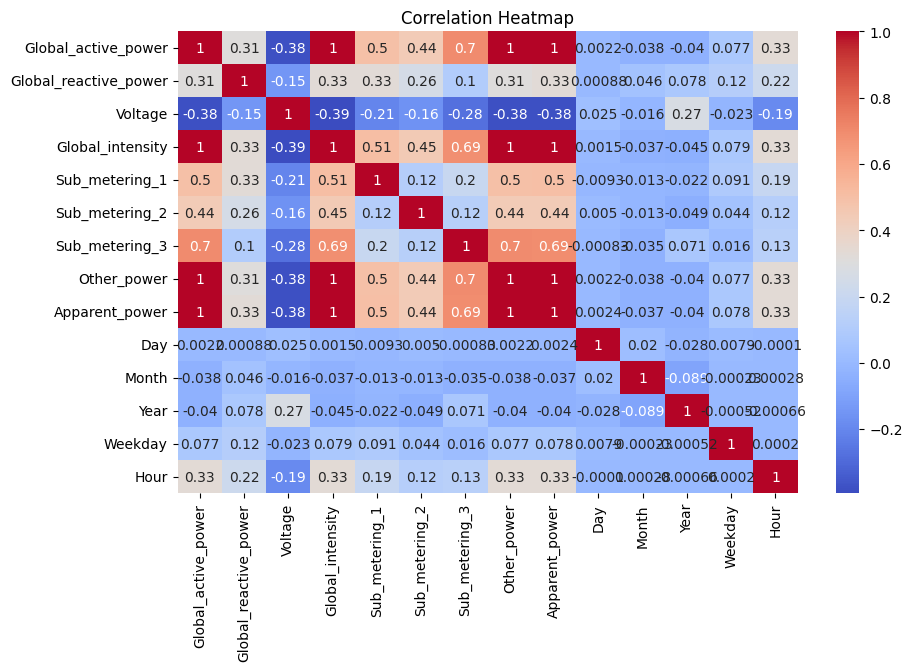

In [29]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [30]:
# Mean per Year
print("Mean per Year:")
print(df.groupby('Year')['Global_active_power'].mean())

# Mean per Month
print("\nMean per Month:")
print(df.groupby('Month')['Global_active_power'].mean())

# Mean per Day
print("\nMean per Day:")
print(df.groupby('Day')['Global_active_power'].mean())

# Mean per Hour
print("\nMean per Hour:")
print(df.groupby('Hour')['Global_active_power'].mean())


# Mean per Weekday (0=Monday, 6=Sunday)
print("\nMean per Weekday:")
print(df.groupby('Weekday')['Global_active_power'].mean())


Mean per Year:
Year
2006    1.903708
2007    1.116637
2008    1.072144
2009    1.078486
2010    1.062133
Name: Global_active_power, dtype: float64

Mean per Month:
Month
1     1.455721
2     1.300347
3     1.229696
4     1.047351
5     1.029575
6     0.911569
7     0.700754
8     0.596978
9     0.979170
10    1.137177
11    1.291402
12    1.490032
Name: Global_active_power, dtype: float64

Mean per Day:
Day
1     1.038116
2     1.004376
3     1.005270
4     1.139490
5     1.118335
6     1.078543
7     1.082878
8     1.151886
9     1.068035
10    1.111488
11    1.129112
12    1.102345
13    1.101237
14    1.123511
15    1.108338
16    1.113415
17    1.125925
18    1.131218
19    1.064685
20    1.131094
21    1.113555
22    1.116583
23    1.121544
24    1.139656
25    1.058045
26    0.963449
27    1.067526
28    1.037515
29    1.067880
30    1.069177
31    1.187934
Name: Global_active_power, dtype: float64

Mean per Hour:
Hour
0     0.659434
1     0.539325
2     0.480621
3     0.444866
4

In [31]:
# Mean per Year
print("Mean per Year:")
print(df.groupby('Year')['Global_reactive_power'].mean())

# Mean per Month
print("\nMean per Month:")
print(df.groupby('Month')['Global_reactive_power'].mean())

# Mean per Day
print("\nMean per Day:")
print(df.groupby('Day')['Global_reactive_power'].mean())

# Mean per Hour
print("\nMean per Hour:")
print(df.groupby('Hour')['Global_reactive_power'].mean())


# Mean per Weekday (0=Monday, 6=Sunday)
print("\nMean per Weekday:")
print(df.groupby('Weekday')['Global_reactive_power'].mean())


Mean per Year:
Year
2006    0.131491
2007    0.117400
2008    0.117111
2009    0.131334
2010    0.129191
Name: Global_reactive_power, dtype: float64

Mean per Month:
Month
1     0.110966
2     0.099672
3     0.111366
4     0.122747
5     0.127903
6     0.145772
7     0.151880
8     0.138741
9     0.132588
10    0.117028
11    0.108751
12    0.113621
Name: Global_reactive_power, dtype: float64

Mean per Day:
Day
1     0.123376
2     0.123168
3     0.119587
4     0.123563
5     0.126402
6     0.125390
7     0.119665
8     0.121316
9     0.123400
10    0.128995
11    0.128390
12    0.127599
13    0.124653
14    0.130524
15    0.122886
16    0.122055
17    0.121803
18    0.119601
19    0.115377
20    0.119419
21    0.123126
22    0.125230
23    0.125364
24    0.126278
25    0.123365
26    0.118836
27    0.126991
28    0.125117
29    0.122961
30    0.127975
31    0.122756
Name: Global_reactive_power, dtype: float64

Mean per Hour:
Hour
0     0.114974
1     0.104968
2     0.105100
3     0.10

In [32]:
# Mean per Year
print("Mean per Year:")
print(df.groupby('Year')['Apparent_power'].mean())

# Mean per Month
print("\nMean per Month:")
print(df.groupby('Month')['Apparent_power'].mean())

# Mean per Day
print("\nMean per Day:")
print(df.groupby('Day')['Apparent_power'].mean())

# Mean per Hour
print("\nMean per Hour:")
print(df.groupby('Hour')['Apparent_power'].mean())

# Mean per Weekday (0=Monday, 6=Sunday)
print("\nMean per Weekday:")
print(df.groupby('Weekday')['Apparent_power'].mean())

Mean per Year:
Year
2006    1.916448
2007    1.133756
2008    1.089529
2009    1.097950
2010    1.079589
Name: Apparent_power, dtype: float64

Mean per Month:
Month
1     1.466516
2     1.310436
3     1.242139
4     1.063752
5     1.047193
6     0.936314
7     0.731291
8     0.629811
9     0.999654
10    1.150962
11    1.302658
12    1.501077
Name: Apparent_power, dtype: float64

Mean per Day:
Day
1     1.055645
2     1.022405
3     1.022620
4     1.156855
5     1.136484
6     1.096533
7     1.100181
8     1.168121
9     1.085988
10    1.130190
11    1.148319
12    1.121147
13    1.118774
14    1.142368
15    1.125958
16    1.131195
17    1.143027
18    1.147535
19    1.080748
20    1.147378
21    1.130773
22    1.134644
23    1.139956
24    1.157691
25    1.076742
26    0.982089
27    1.086517
28    1.056449
29    1.085475
30    1.087521
31    1.204642
Name: Apparent_power, dtype: float64

Mean per Hour:
Hour
0     0.680839
1     0.559852
2     0.502212
3     0.466719
4     0.464786
5

C:\Users\sures\AppData\Local\Temp\ipykernel_22740\733007667.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hour', y='Global_active_power', data=df, ci=None)


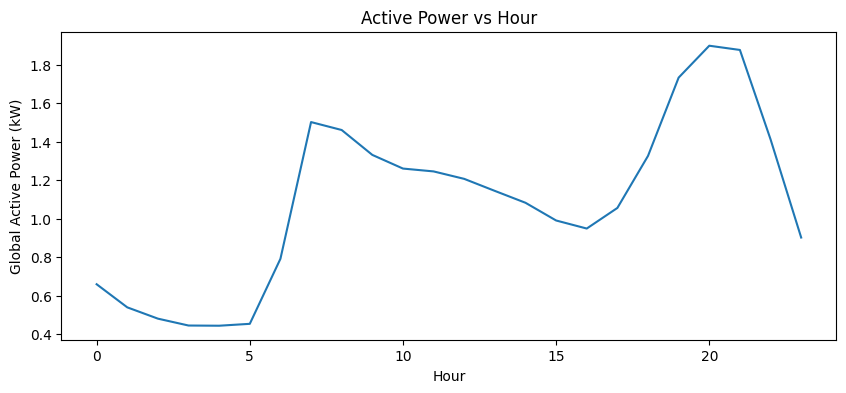

C:\Users\sures\AppData\Local\Temp\ipykernel_22740\733007667.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Day', y='Global_active_power', data=df, ci=None)


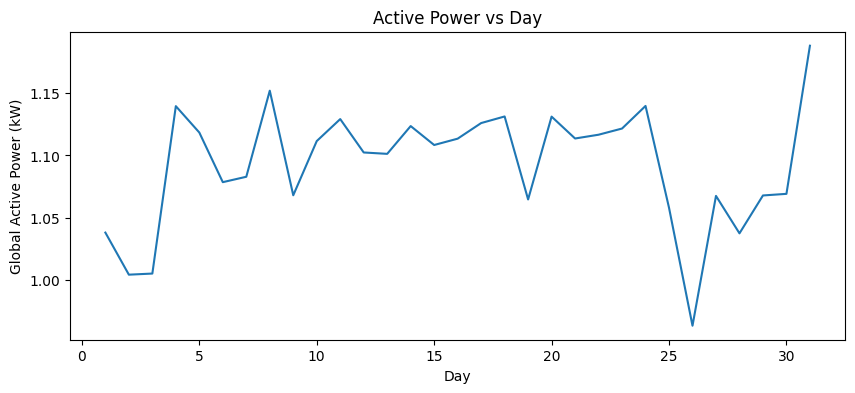

C:\Users\sures\AppData\Local\Temp\ipykernel_22740\733007667.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hour', y='Global_active_power', hue='Weekday', data=df, ci=None, palette='tab10')


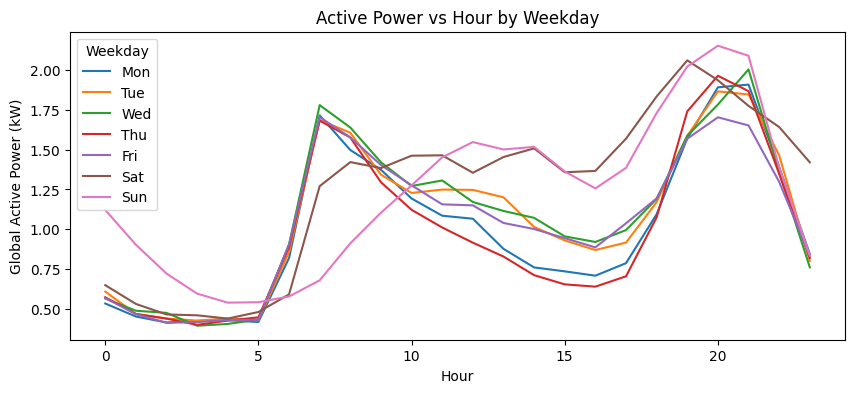

C:\Users\sures\AppData\Local\Temp\ipykernel_22740\733007667.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Global_active_power', data=df, ci=None)


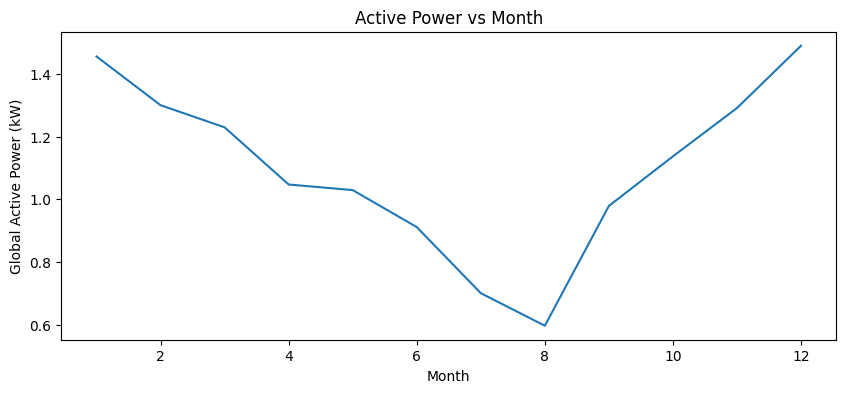

C:\Users\sures\AppData\Local\Temp\ipykernel_22740\733007667.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Global_active_power', data=df, ci=None)


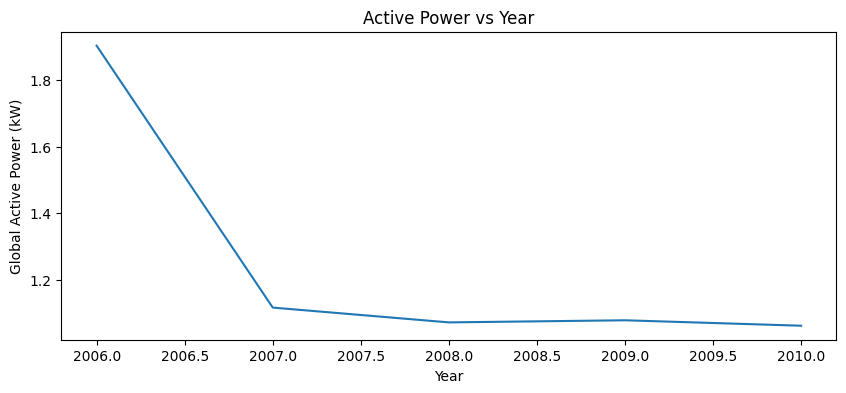

In [33]:
# Active Power vs Hour
plt.figure(figsize=(10, 4))
sns.lineplot(x='Hour', y='Global_active_power', data=df, ci=None)
plt.title('Active Power vs Hour')
plt.xlabel('Hour')
plt.ylabel('Global Active Power (kW)')
plt.show()

# Active Power vs Day
plt.figure(figsize=(10, 4))
sns.lineplot(x='Day', y='Global_active_power', data=df, ci=None)
plt.title('Active Power vs Day')
plt.xlabel('Day')
plt.ylabel('Global Active Power (kW)')
plt.show()

# Active Power vs Weekday (with legend for 7 weekdays)
plt.figure(figsize=(10, 4))
sns.lineplot(x='Hour', y='Global_active_power', hue='Weekday', data=df, ci=None, palette='tab10')
plt.title('Active Power vs Hour by Weekday')
plt.xlabel('Hour')
plt.ylabel('Global Active Power (kW)')
plt.legend(title='Weekday', labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Active Power vs Month
plt.figure(figsize=(10, 4))
sns.lineplot(x='Month', y='Global_active_power', data=df, ci=None)
plt.title('Active Power vs Month')
plt.xlabel('Month')
plt.ylabel('Global Active Power (kW)')
plt.show()

# Active Power vs Year
plt.figure(figsize=(10, 4))
sns.lineplot(x='Year', y='Global_active_power', data=df, ci=None)
plt.title('Active Power vs Year')
plt.xlabel('Year')
plt.ylabel('Global Active Power (kW)')
plt.show()

C:\Users\sures\AppData\Local\Temp\ipykernel_22740\3668904178.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hour', y='Global_reactive_power', data=df, ci=None)


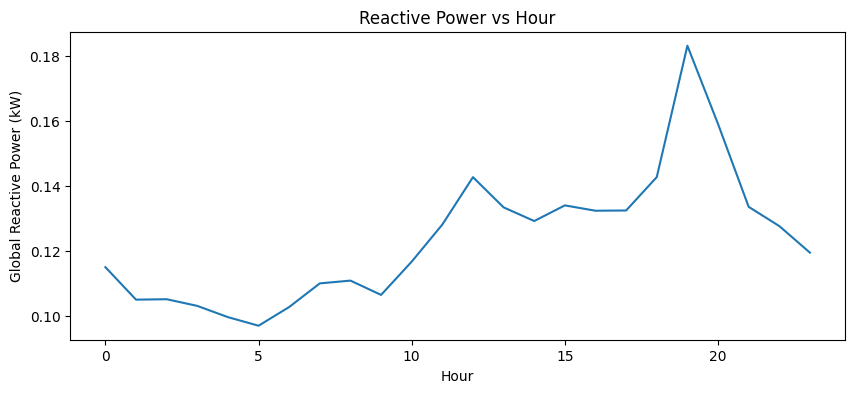

C:\Users\sures\AppData\Local\Temp\ipykernel_22740\3668904178.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Day', y='Global_reactive_power', data=df, ci=None)


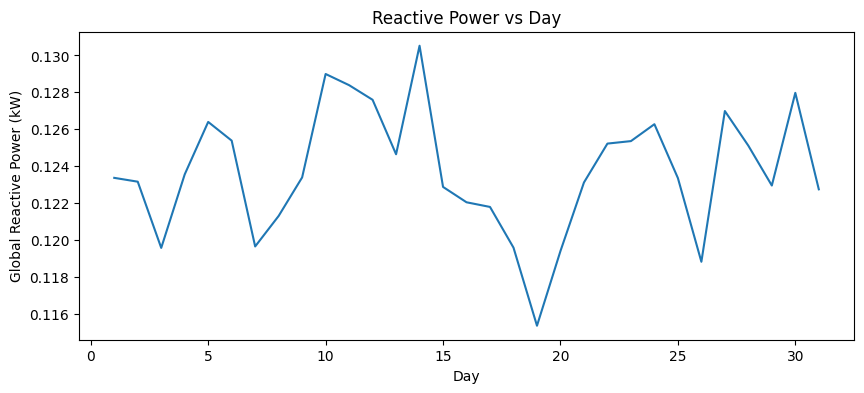

C:\Users\sures\AppData\Local\Temp\ipykernel_22740\3668904178.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hour', y='Global_reactive_power', hue='Weekday', data=df, ci=None, palette='tab10')


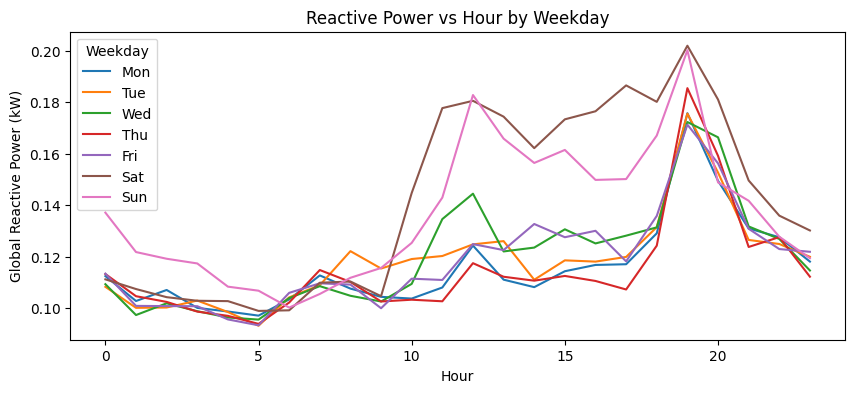

C:\Users\sures\AppData\Local\Temp\ipykernel_22740\3668904178.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Global_reactive_power', data=df, ci=None)


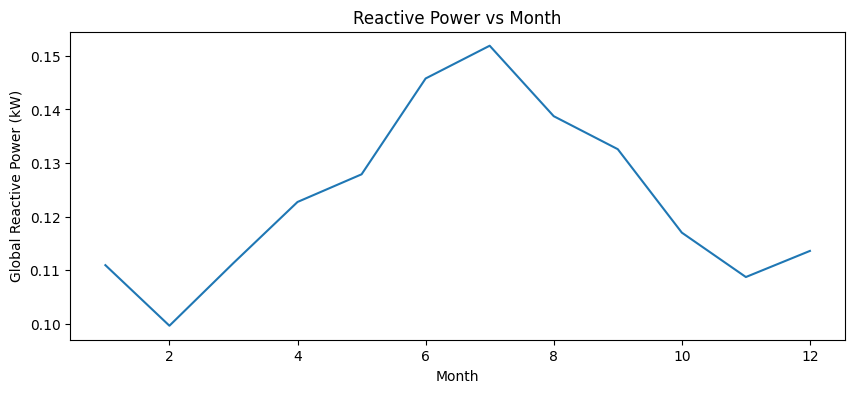

C:\Users\sures\AppData\Local\Temp\ipykernel_22740\3668904178.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Global_reactive_power', data=df, ci=None)


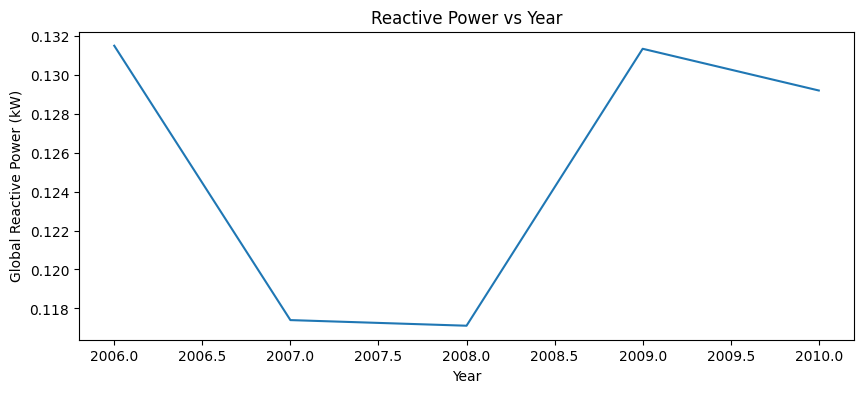

In [34]:
# Reactive Power vs Hour
plt.figure(figsize=(10, 4))
sns.lineplot(x='Hour', y='Global_reactive_power', data=df, ci=None)
plt.title('Reactive Power vs Hour')
plt.xlabel('Hour')
plt.ylabel('Global Reactive Power (kW)')
plt.show()

# Reactive Power vs Day
plt.figure(figsize=(10, 4))
sns.lineplot(x='Day', y='Global_reactive_power', data=df, ci=None)
plt.title('Reactive Power vs Day')
plt.xlabel('Day')
plt.ylabel('Global Reactive Power (kW)')
plt.show()

# Reactive Power vs Weekday (with legend for 7 weekdays)
plt.figure(figsize=(10, 4))
sns.lineplot(x='Hour', y='Global_reactive_power', hue='Weekday', data=df, ci=None, palette='tab10')
plt.title('Reactive Power vs Hour by Weekday')
plt.xlabel('Hour')
plt.ylabel('Global Reactive Power (kW)')
plt.legend(title='Weekday', labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Reactive Power vs Month
plt.figure(figsize=(10, 4))
sns.lineplot(x='Month', y='Global_reactive_power', data=df, ci=None)
plt.title('Reactive Power vs Month')
plt.xlabel('Month')
plt.ylabel('Global Reactive Power (kW)')
plt.show()

# Reactive Power vs Year
plt.figure(figsize=(10, 4))
sns.lineplot(x='Year', y='Global_reactive_power', data=df, ci=None)
plt.title('Reactive Power vs Year')
plt.xlabel('Year')
plt.ylabel('Global Reactive Power (kW)')
plt.show()

C:\Users\sures\AppData\Local\Temp\ipykernel_22740\353479362.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hour', y='Apparent_power', data=df, ci=None)


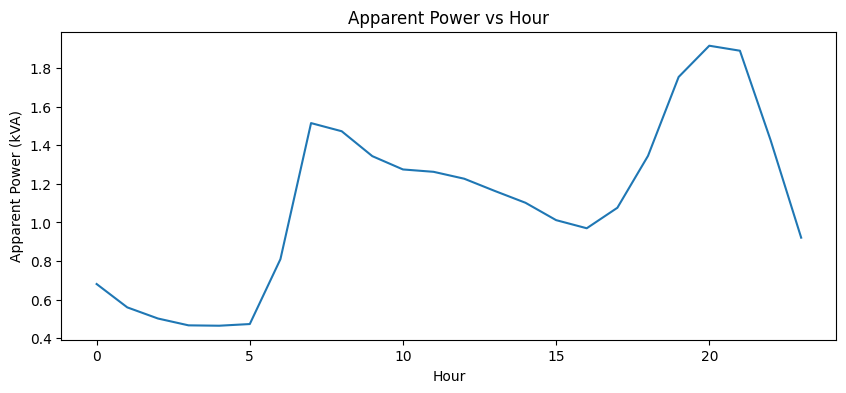

C:\Users\sures\AppData\Local\Temp\ipykernel_22740\353479362.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Day', y='Apparent_power', data=df, ci=None)


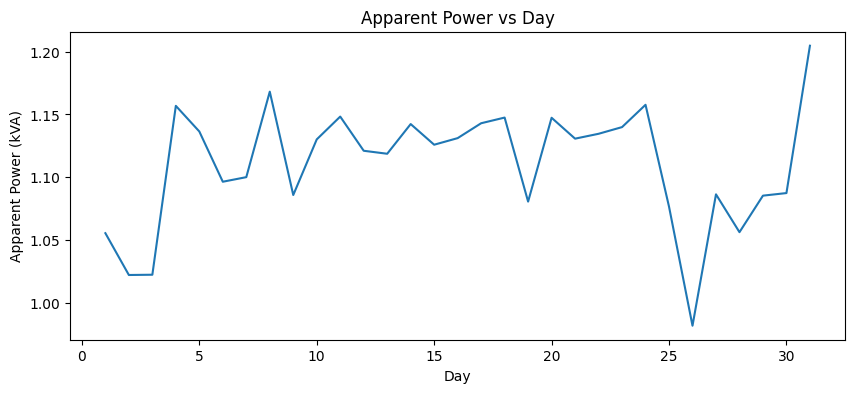

C:\Users\sures\AppData\Local\Temp\ipykernel_22740\353479362.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hour', y='Apparent_power', hue='Weekday', data=df, ci=None, palette='tab10')


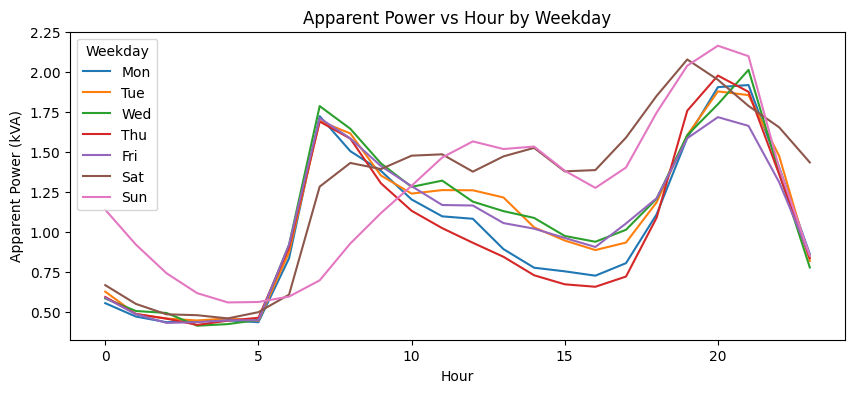

C:\Users\sures\AppData\Local\Temp\ipykernel_22740\353479362.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Apparent_power', data=df, ci=None)


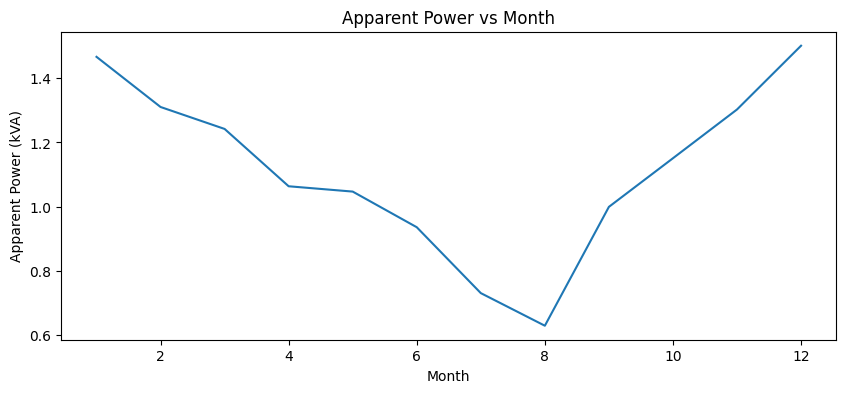

C:\Users\sures\AppData\Local\Temp\ipykernel_22740\353479362.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Apparent_power', data=df, ci=None)


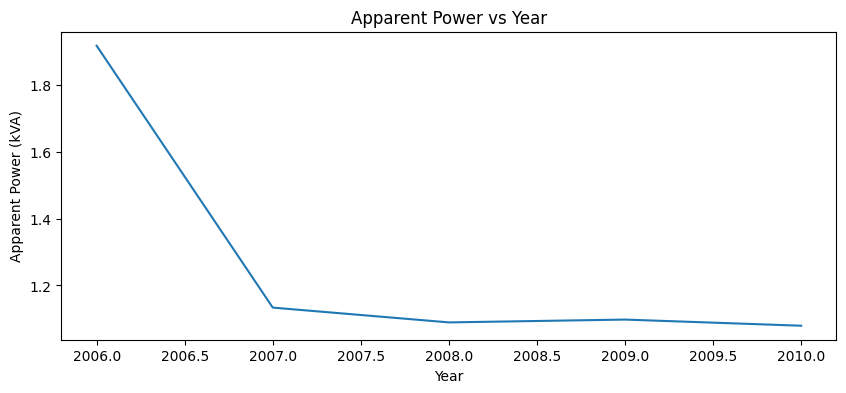

In [35]:
# Apparent Power vs Hour
plt.figure(figsize=(10, 4))
sns.lineplot(x='Hour', y='Apparent_power', data=df, ci=None)
plt.title('Apparent Power vs Hour')
plt.xlabel('Hour')
plt.ylabel('Apparent Power (kVA)')
plt.show()

# Apparent Power vs Day
plt.figure(figsize=(10, 4))
sns.lineplot(x='Day', y='Apparent_power', data=df, ci=None)
plt.title('Apparent Power vs Day')
plt.xlabel('Day')
plt.ylabel('Apparent Power (kVA)')
plt.show()

# Apparent Power vs Weekday (with legend for 7 weekdays)
plt.figure(figsize=(10, 4))
sns.lineplot(x='Hour', y='Apparent_power', hue='Weekday', data=df, ci=None, palette='tab10')
plt.title('Apparent Power vs Hour by Weekday')
plt.xlabel('Hour')
plt.ylabel('Apparent Power (kVA)')
plt.legend(title='Weekday', labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Apparent Power vs Month
plt.figure(figsize=(10, 4))
sns.lineplot(x='Month', y='Apparent_power', data=df, ci=None)
plt.title('Apparent Power vs Month')
plt.xlabel('Month')
plt.ylabel('Apparent Power (kVA)')
plt.show()

# Apparent Power vs Year
plt.figure(figsize=(10, 4))
sns.lineplot(x='Year', y='Apparent_power', data=df, ci=None)
plt.title('Apparent Power vs Year')
plt.xlabel('Year')
plt.ylabel('Apparent Power (kVA)')
plt.show()

C:\Users\sures\AppData\Local\Temp\ipykernel_22740\1181787345.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sum = df.resample('M')[['Global_active_power', 'Global_reactive_power', 'Apparent_power']].sum().reset_index()


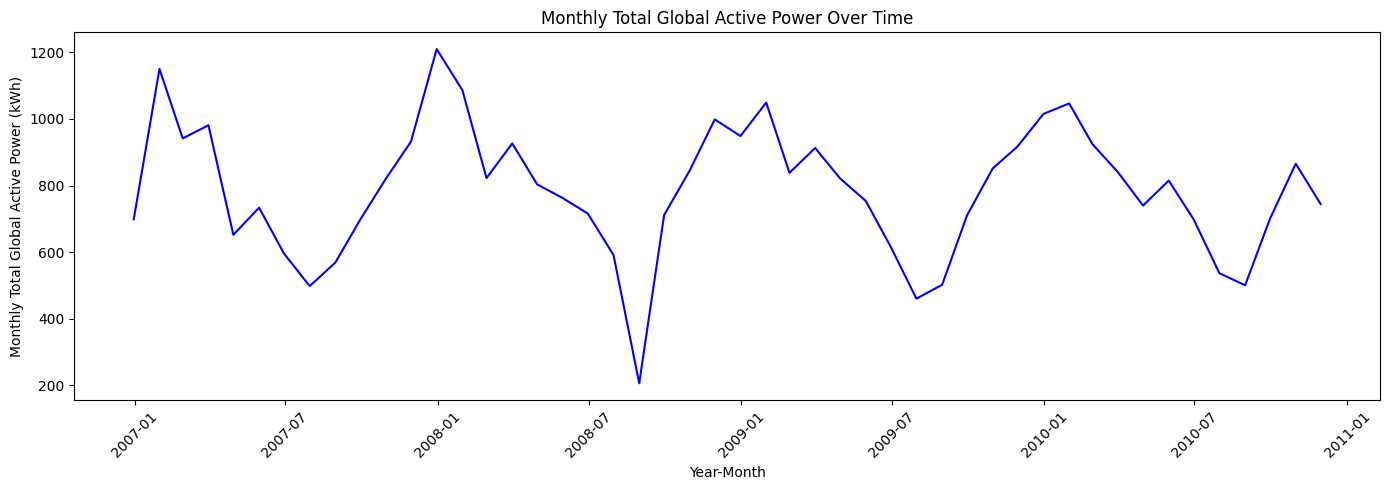

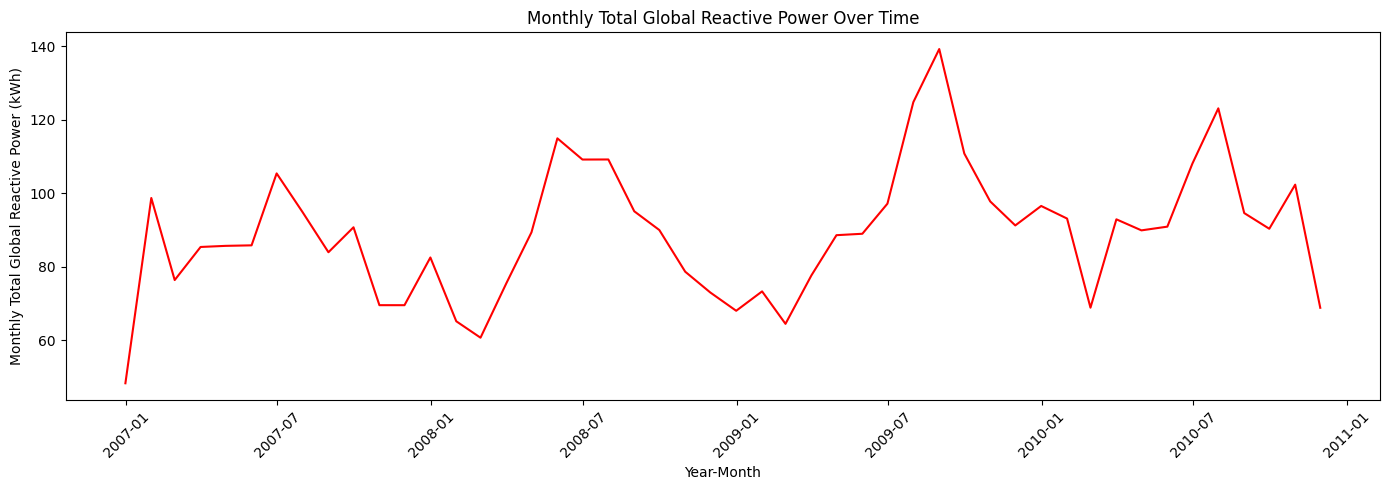

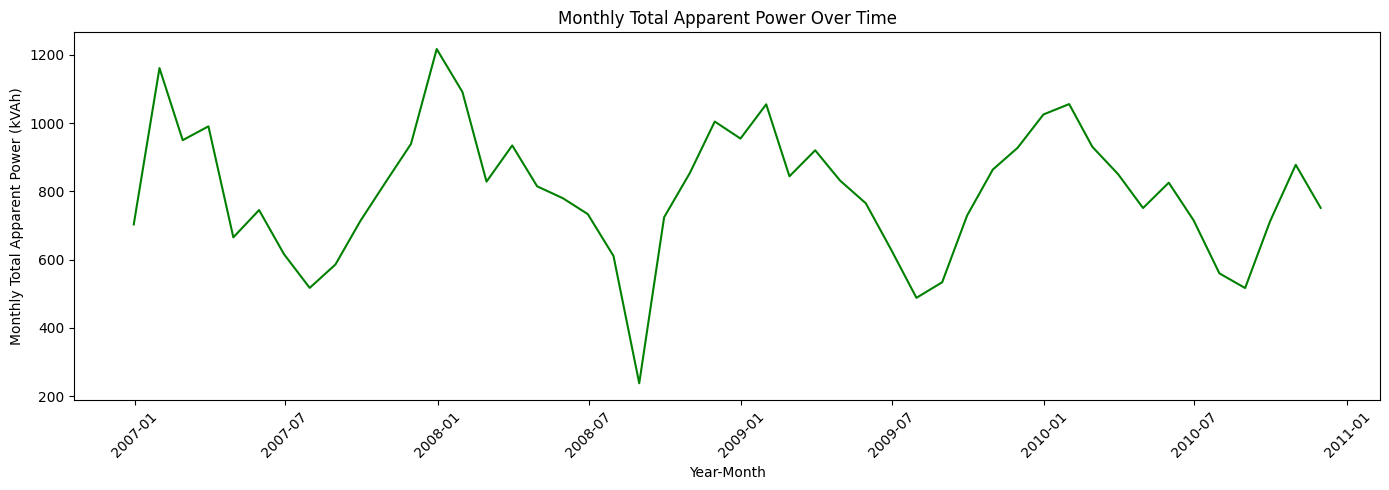

In [36]:
# Resample to monthly and aggregate the sums
monthly_sum = df.resample('M')[['Global_active_power', 'Global_reactive_power', 'Apparent_power']].sum().reset_index()

# Plot Monthly Global Active Power
plt.figure(figsize=(14, 5))
plt.plot(monthly_sum['Datetime'], monthly_sum['Global_active_power'], color='blue')
plt.title('Monthly Total Global Active Power Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Monthly Total Global Active Power (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Monthly Global Reactive Power
plt.figure(figsize=(14, 5))
plt.plot(monthly_sum['Datetime'], monthly_sum['Global_reactive_power'], color='red')
plt.title('Monthly Total Global Reactive Power Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Monthly Total Global Reactive Power (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Monthly Apparent Power
plt.figure(figsize=(14, 5))
plt.plot(monthly_sum['Datetime'], monthly_sum['Apparent_power'], color='green')
plt.title('Monthly Total Apparent Power Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Monthly Total Apparent Power (kVAh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

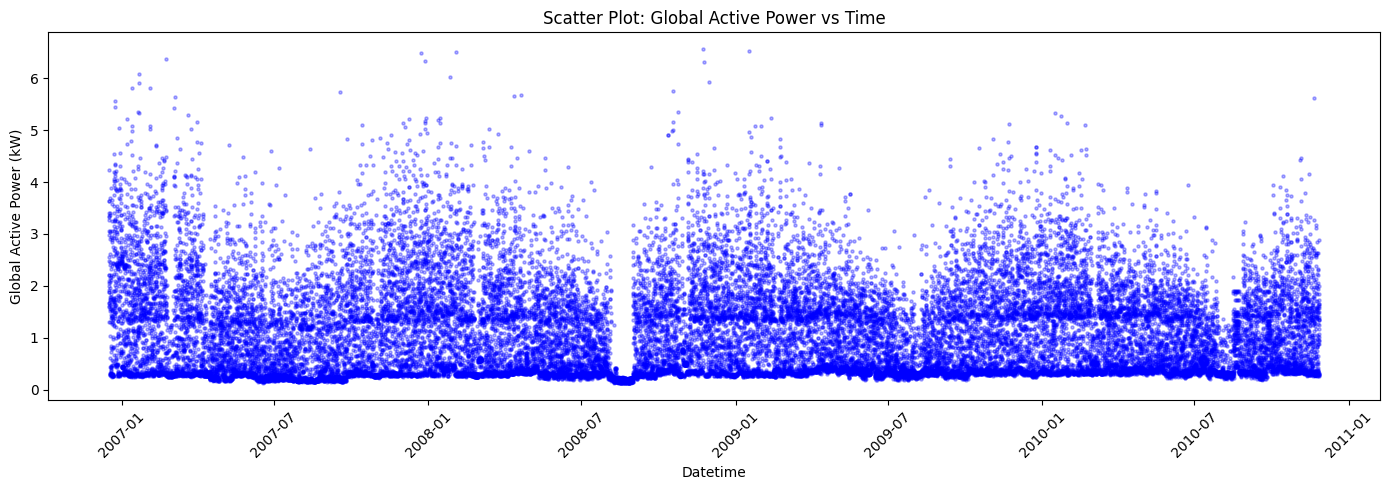

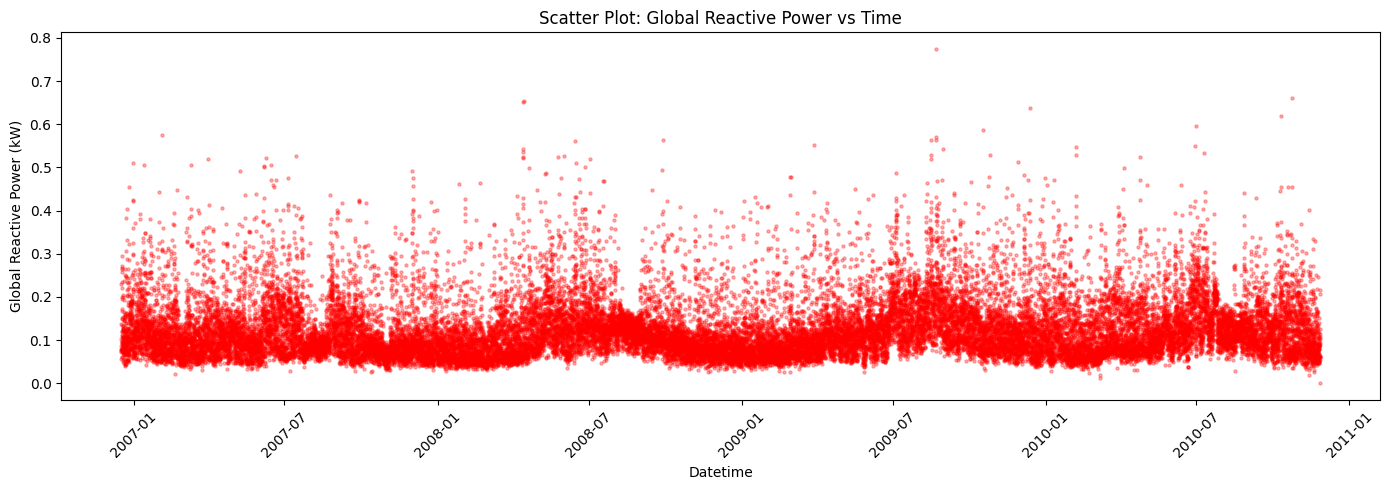

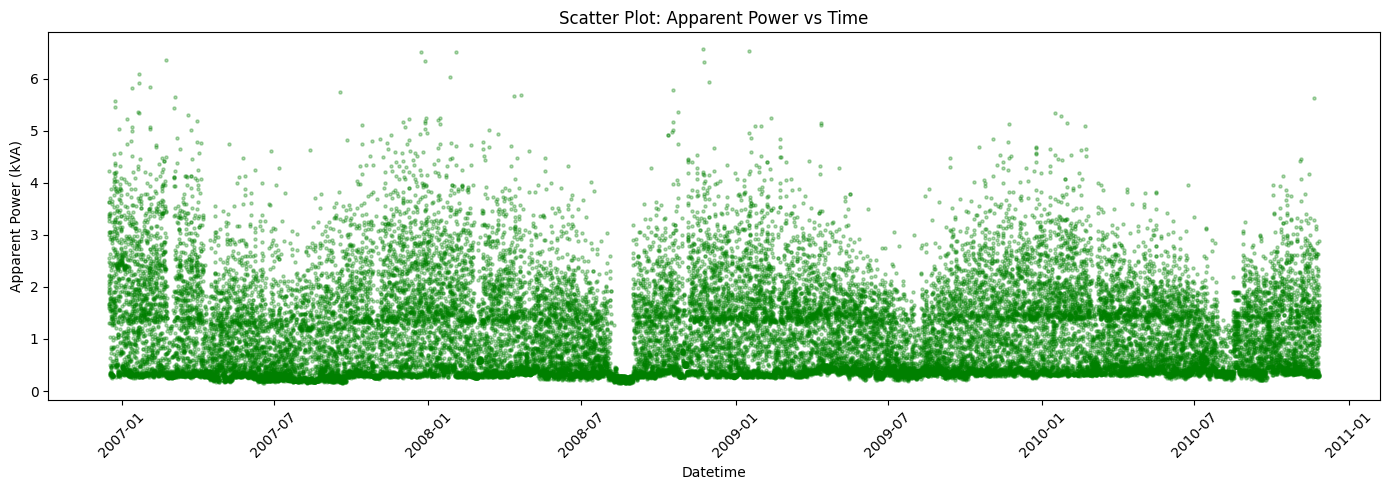

In [37]:
# Scatter plot: Global Active Power vs Time
plt.figure(figsize=(14, 5))
plt.scatter(df.index, df['Global_active_power'], alpha=0.3, color='blue', s=5)
plt.title('Scatter Plot: Global Active Power vs Time')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power (kW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter plot: Global Reactive Power vs Time
plt.figure(figsize=(14, 5))
plt.scatter(df.index, df['Global_reactive_power'], alpha=0.3, color='red', s=5)
plt.title('Scatter Plot: Global Reactive Power vs Time')
plt.xlabel('Datetime')
plt.ylabel('Global Reactive Power (kW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter plot: Apparent Power vs Time
plt.figure(figsize=(14, 5))
plt.scatter(df.index, df[apparent_power_col], alpha=0.3, color='green', s=5)
plt.title('Scatter Plot: Apparent Power vs Time')
plt.xlabel('Datetime')
plt.ylabel('Apparent Power (kVA)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\sures\AppData\Local\Temp\ipykernel_22740\1088504687.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Year')


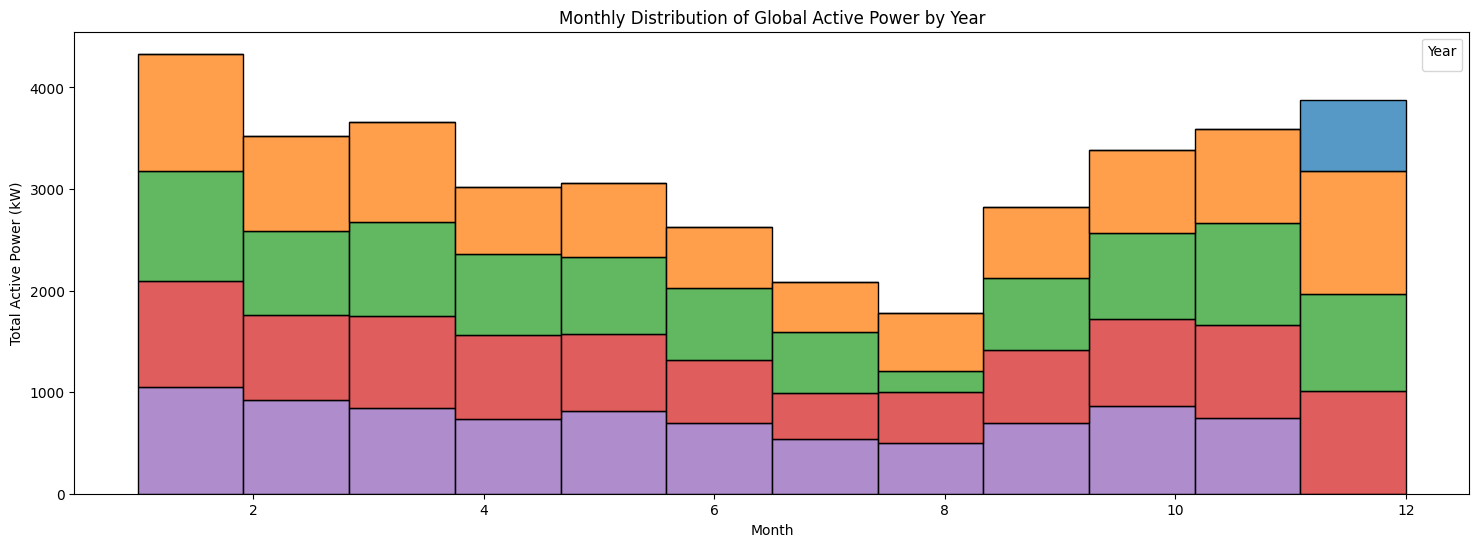

C:\Users\sures\AppData\Local\Temp\ipykernel_22740\1088504687.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Year')


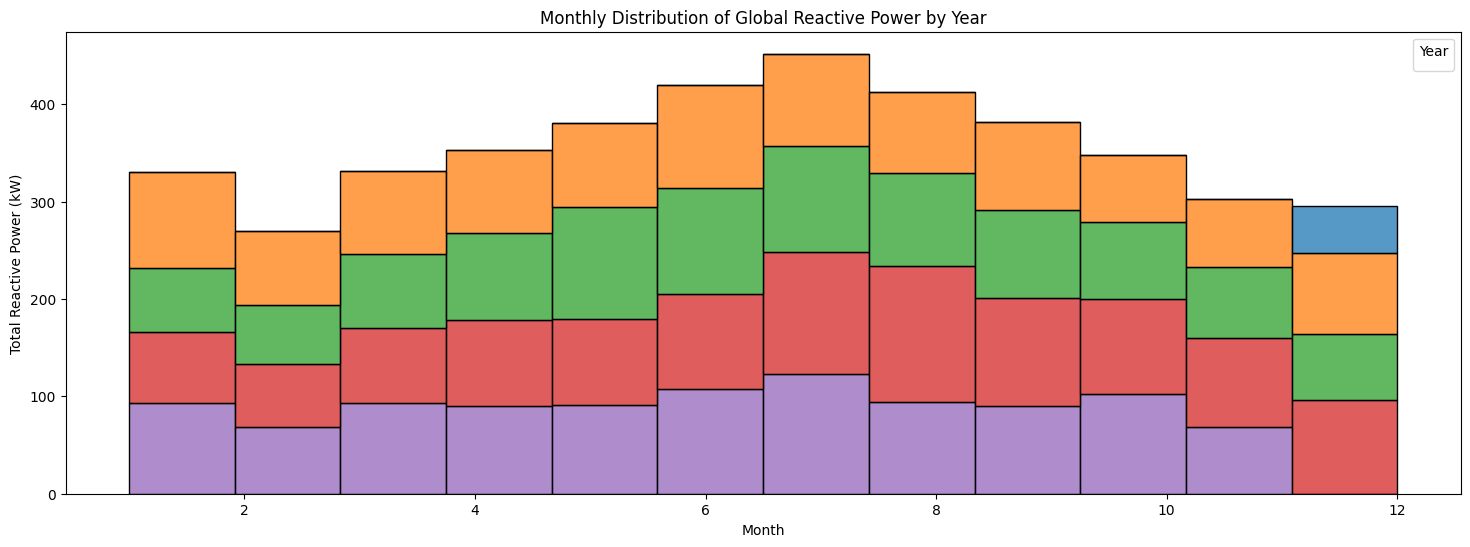

In [38]:
# Plot histogram of Global Active Power for each month-year combination
plt.figure(figsize=(18, 6))
sns.histplot(
    data=df,
    x='Month',
    hue='Year',
    weights='Global_active_power',
    multiple='stack',
    bins=12,
    palette='tab10'
)
plt.title('Monthly Distribution of Global Active Power by Year')
plt.xlabel('Month')
plt.ylabel('Total Active Power (kW)')
plt.legend(title='Year')
plt.show()

# Plot histogram of Global Reactive Power for each month-year combination
plt.figure(figsize=(18, 6))
sns.histplot(
    data=df,
    x='Month',
    hue='Year',
    weights='Global_reactive_power',
    multiple='stack',
    bins=12,
    palette='tab10'
)
plt.title('Monthly Distribution of Global Reactive Power by Year')
plt.xlabel('Month')
plt.ylabel('Total Reactive Power (kW)')
plt.legend(title='Year')
plt.show()

In [39]:
# 1. Is_Weekend (1 if Saturday or Sunday)
df['Is_Weekend'] = df.index.weekday >= 5  # 5 = Saturday, 6 = Sunday
df['Is_Weekend'] = df['Is_Weekend'].astype(int)

# 2. Season based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df.index.month.map(get_season)

# 3. Cyclical Encoding for Hour
df['Hour'] = df.index.hour
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

# 4. Cyclical Encoding for Weekday
df['Weekday'] = df.index.weekday
df['Weekday_sin'] = np.sin(2 * np.pi * df['Weekday'] / 7)
df['Weekday_cos'] = np.cos(2 * np.pi * df['Weekday'] / 7)

# 5. Cyclical Encoding for Month
df['Month'] = df.index.month
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# 6. Peak Hour Flag (example: 6 PM to 9 PM considered peak)
df['Is_Peak_Hour'] = df['Hour'].isin([18, 19, 20]).astype(int)


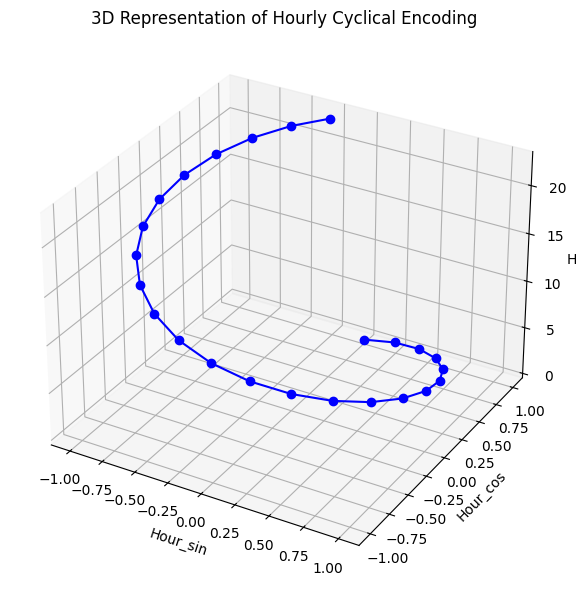

In [40]:

from mpl_toolkits.mplot3d import Axes3D

# Generate hours from 0 to 23
hours = np.arange(0, 24)

# Calculate cyclical encodings
hour_sin = np.sin(2 * np.pi * hours / 24)
hour_cos = np.cos(2 * np.pi * hours / 24)

# Create a DataFrame
df_cycle = pd.DataFrame({
    'Hour': hours,
    'Hour_sin': hour_sin,
    'Hour_cos': hour_cos
})

# 3D Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df_cycle['Hour_sin'], df_cycle['Hour_cos'], df_cycle['Hour'], marker='o', color='blue')

ax.set_xlabel('Hour_sin')
ax.set_ylabel('Hour_cos')
ax.set_zlabel('Hour')
ax.set_title('3D Representation of Hourly Cyclical Encoding')

plt.tight_layout()
plt.show()


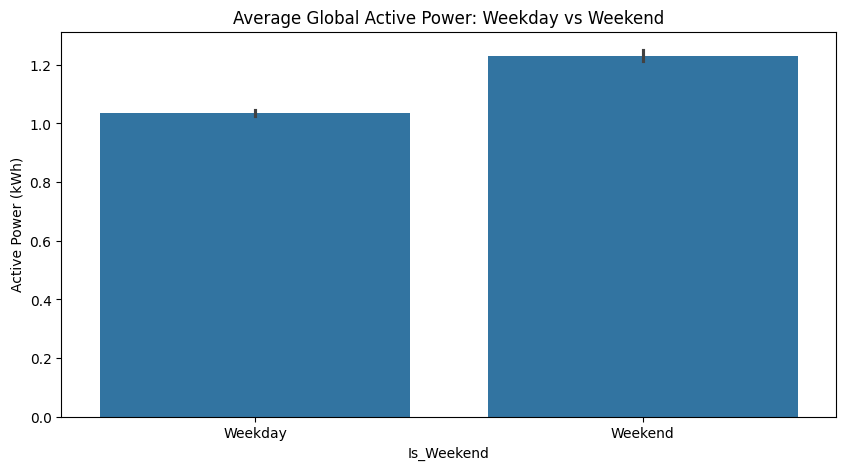

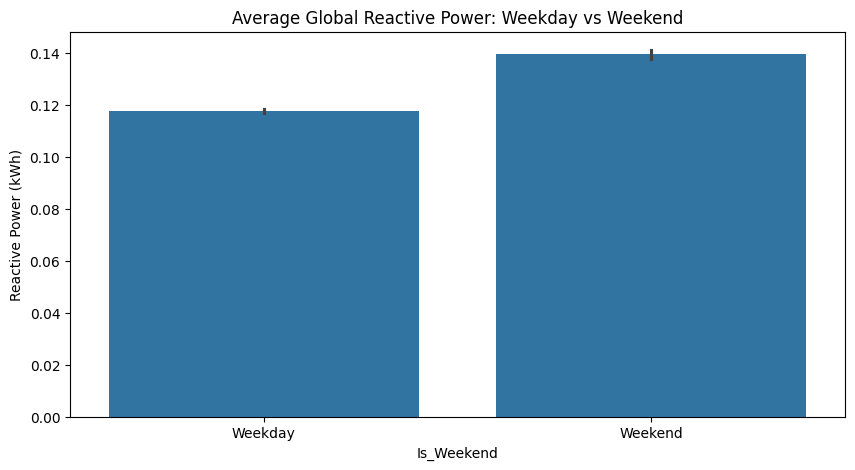

In [41]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Is_Weekend', y='Global_active_power', data=df, estimator='mean')
plt.title('Average Global Active Power: Weekday vs Weekend')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.ylabel('Active Power (kWh)')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Is_Weekend', y='Global_reactive_power', data=df, estimator='mean')
plt.title('Average Global Reactive Power: Weekday vs Weekend')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.ylabel('Reactive Power (kWh)')
plt.show()


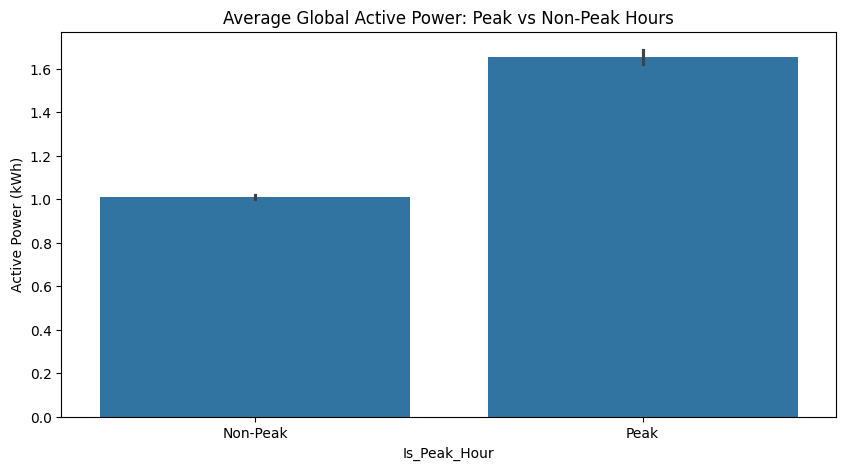

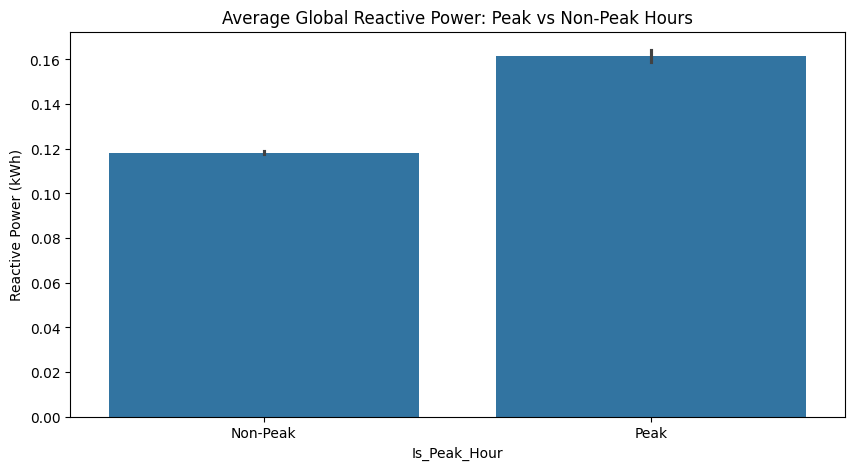

In [42]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Is_Peak_Hour', y='Global_active_power', data=df, estimator='mean')
plt.title('Average Global Active Power: Peak vs Non-Peak Hours')
plt.xticks([0, 1], ['Non-Peak', 'Peak'])
plt.ylabel('Active Power (kWh)')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Is_Peak_Hour', y='Global_reactive_power', data=df, estimator='mean')
plt.title('Average Global Reactive Power: Peak vs Non-Peak Hours')
plt.xticks([0, 1], ['Non-Peak', 'Peak'])
plt.ylabel('Reactive Power (kWh)')
plt.show()


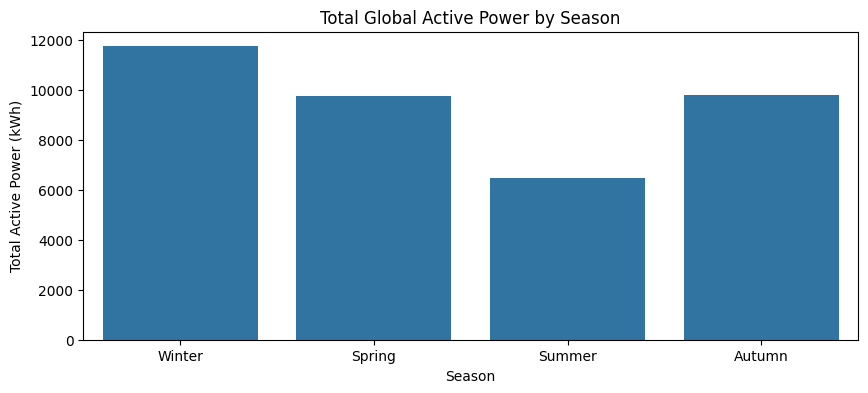

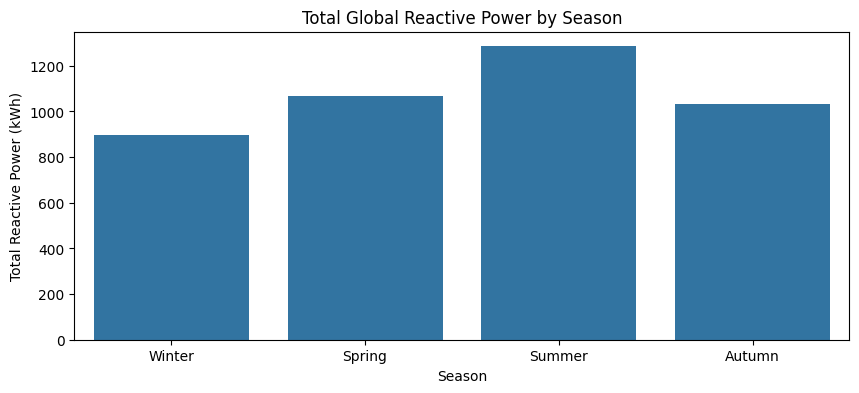

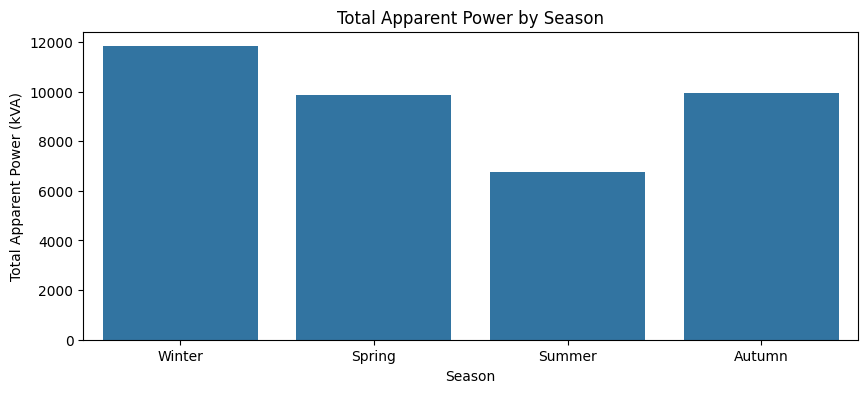

In [43]:
season_sum = df.groupby('Season')[['Global_active_power', 'Global_reactive_power','Apparent_power']].sum().reset_index()

# Active Power
plt.figure(figsize=(10, 4))
sns.barplot(data=season_sum, x='Season', y='Global_active_power', order=['Winter', 'Spring', 'Summer', 'Autumn'])
plt.title('Total Global Active Power by Season')
plt.ylabel('Total Active Power (kWh)')
plt.show()

# Reactive Power
plt.figure(figsize=(10, 4))
sns.barplot(data=season_sum, x='Season', y='Global_reactive_power', order=['Winter', 'Spring', 'Summer', 'Autumn'])
plt.title('Total Global Reactive Power by Season')
plt.ylabel('Total Reactive Power (kWh)')
plt.show()

# Apparent Power
plt.figure(figsize=(10, 4))
sns.barplot(data=season_sum, x='Season', y='Apparent_power', order=['Winter', 'Spring', 'Summer', 'Autumn'])
plt.title('Total Apparent Power by Season')
plt.ylabel('Total Apparent Power (kVA)')
plt.show()


In [44]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Other_power', 'Apparent_power', 'Day', 'Month',
       'Year', 'Weekday', 'Hour', 'Is_Weekend', 'Season', 'Hour_sin',
       'Hour_cos', 'Weekday_sin', 'Weekday_cos', 'Month_sin', 'Month_cos',
       'Is_Peak_Hour'],
      dtype='object')

In [45]:
# Map Season to numeric values: Winter=0, Spring=1, Summer=2, Autumn=3
season_map = {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3}
df['Season'] = df['Season'].map(season_map)

<Figure size 1000x600 with 0 Axes>

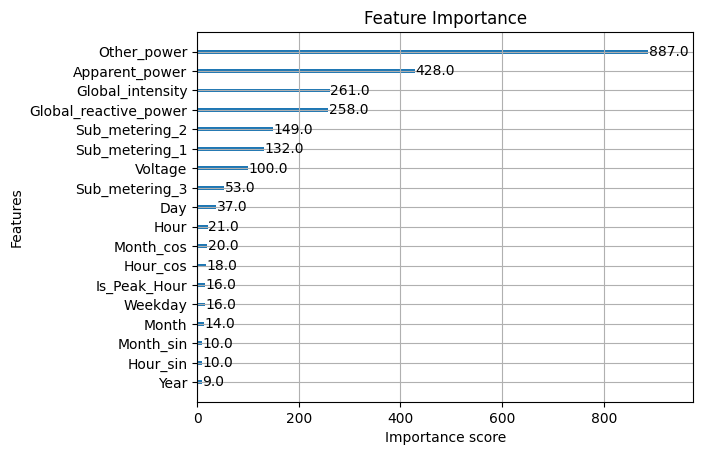

In [46]:
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Features and targets
features = ['Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Other_power', 'Apparent_power', 'Day', 'Month',
       'Year', 'Weekday', 'Hour', 'Is_Weekend', 'Season', 'Hour_sin',
       'Hour_cos', 'Weekday_sin', 'Weekday_cos', 'Month_sin', 'Month_cos',
       'Is_Peak_Hour']
target = 'Global_active_power'

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

model.fit(X_train, y_train)

# Plot feature importances
plt.figure(figsize=(10, 6))
plot_importance(model, max_num_features=18)
plt.title("Feature Importance")
plt.show()


In [47]:
# Assuming df is already prepared with all necessary columns and datetime index

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# Feature set
features = ['Global_intensity', 'Day', 'Month', 'Year', 'Weekday', 'Hour', 'Is_Weekend', 'Season', 'Hour_sin', 'Hour_cos','Weekday_sin', 'Weekday_cos', 'Month_sin', 'Month_cos', 'Is_Peak_Hour']


# Target
target = 'Global_active_power'

# Train-test split (80-20, no shuffle for time series)
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



In [48]:
# Train a Linear Regression model to predict Global Active Power

# Use the already defined features and target
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results (Global Active Power):")
print(f"MSE: {mse_lr:.4f}")
print(f"R2 Score: {r2_lr:.4f}")

Linear Regression Results (Global Active Power):
MSE: 0.0008
R2 Score: 0.9985


In [49]:
# Ridge Regression model to predict Global Active Power

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Results (Global Active Power):")
print(f"MSE: {mse_ridge:.4f}")
print(f"R2 Score: {r2_ridge:.4f}")

Ridge Regression Results (Global Active Power):
MSE: 0.0008
R2 Score: 0.9985


In [50]:
# Lasso Regression model to predict Global Active Power

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Results (Global Active Power):")
print(f"MSE: {mse_lasso:.4f}")
print(f"R2 Score: {r2_lasso:.4f}")

Lasso Regression Results (Global Active Power):
MSE: 0.0427
R2 Score: 0.9194


In [51]:
# Decision Tree Regression model to predict Global Active Power

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regression Results (Global Active Power):")
print(f"MSE: {mse_dt:.4f}")
print(f"R2 Score: {r2_dt:.4f}")

Decision Tree Regression Results (Global Active Power):
MSE: 0.0012
R2 Score: 0.9976


In [52]:
# Random Forest Regression model to predict Global Active Power

rf_model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Results (Global Active Power):")
print(f"MSE: {mse_rf:.4f}")
print(f"R2 Score: {r2_rf:.4f}")

Random Forest Regression Results (Global Active Power):
MSE: 0.0007
R2 Score: 0.9987


In [53]:
# Gradient Boosting Regression model to predict Global Active Power

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regression Results (Global Active Power):")
print(f"MSE: {mse_gb:.4f}")
print(f"R2 Score: {r2_gb:.4f}")

Gradient Boosting Regression Results (Global Active Power):
MSE: 0.0007
R2 Score: 0.9987


In [54]:
# Support Vector Regressor (SVR) to predict Global Active Power

svr_model = SVR()
svr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regressor Results (Global Active Power):")
print(f"MSE: {mse_svr:.4f}")
print(f"R2 Score: {r2_svr:.4f}")

Support Vector Regressor Results (Global Active Power):
MSE: 0.3454
R2 Score: 0.3481


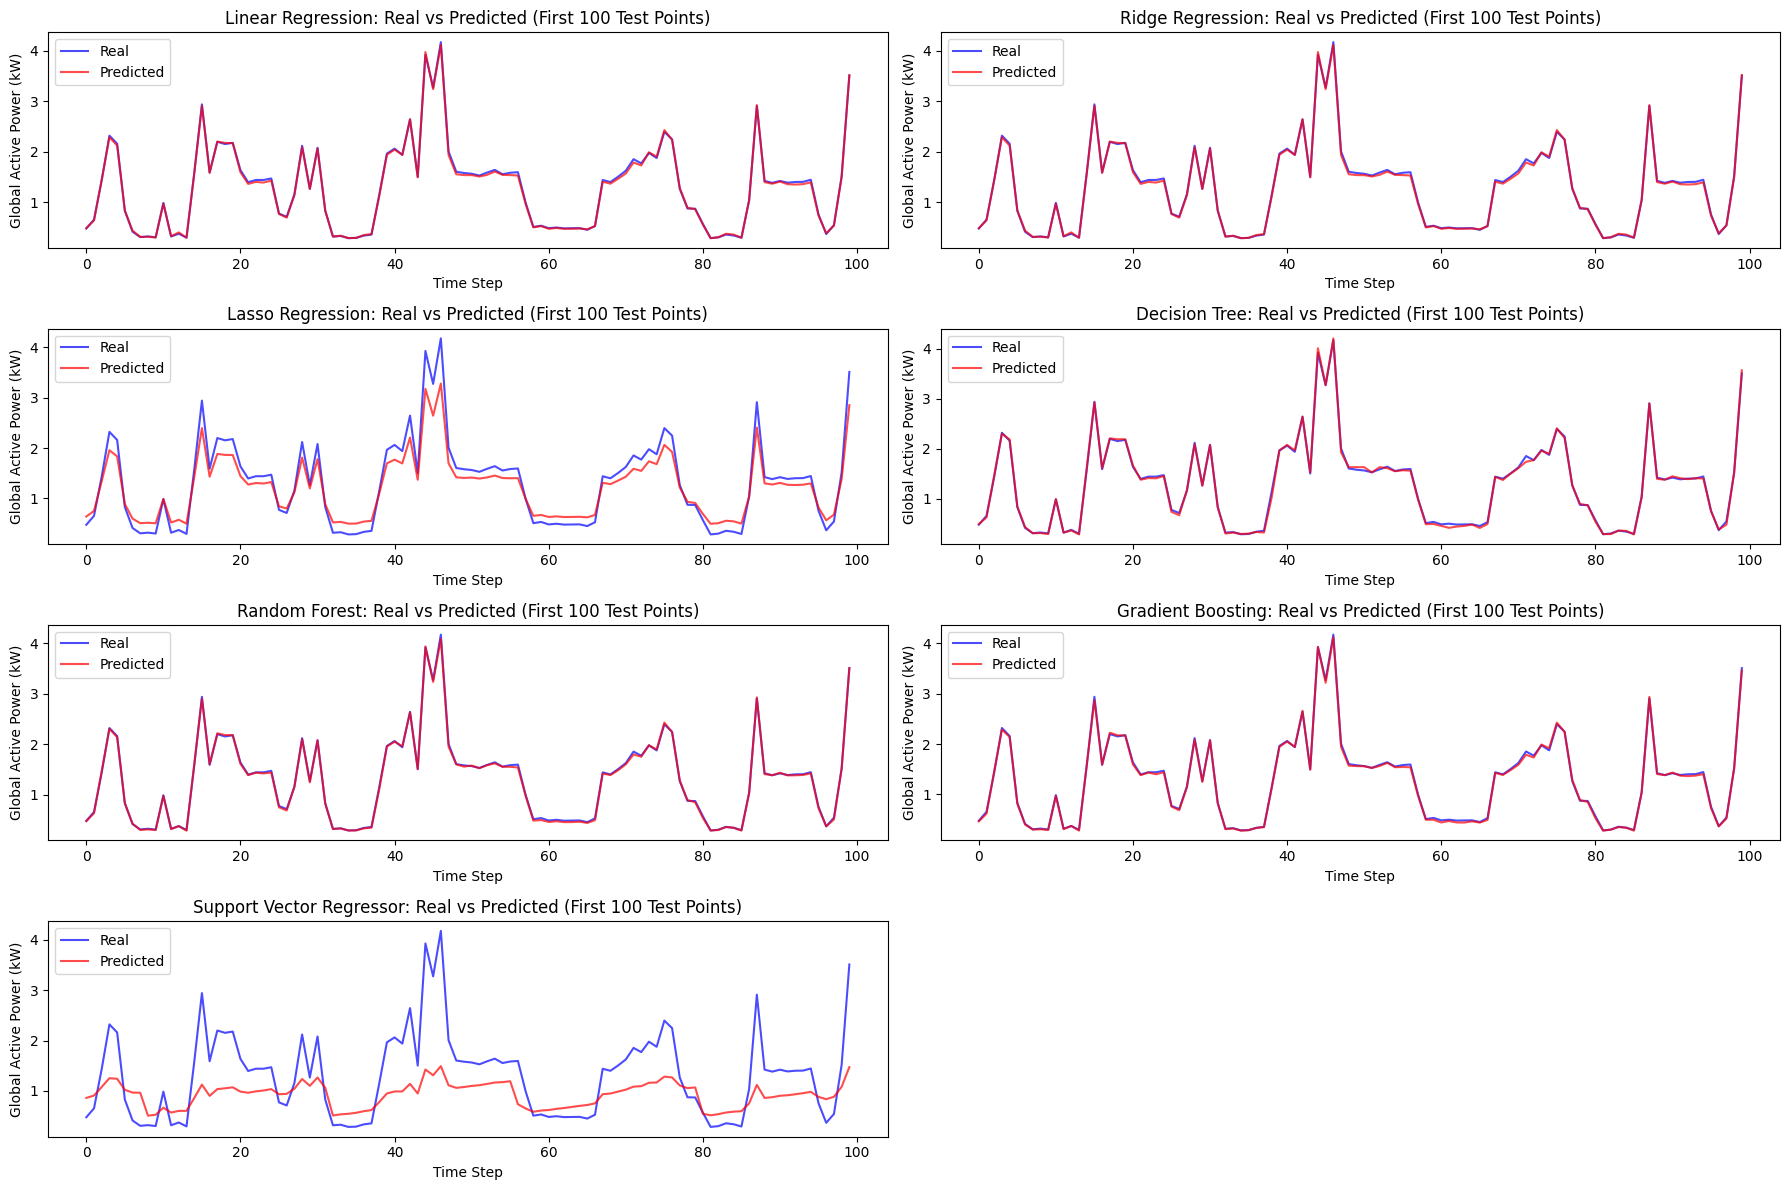

In [55]:
# Plot real vs predicted values for each model (active power) on the test set

model_preds = {
    "Linear Regression": y_pred_lr,
    "Ridge Regression": y_pred_ridge,
    "Lasso Regression": y_pred_lasso,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb,
    "Support Vector Regressor": y_pred_svr
}

plt.figure(figsize=(18, 12))
for i, (name, preds) in enumerate(model_preds.items(), 1):
    plt.subplot(4, 2, i)
    plt.plot(y_test.values[:100], label='Real', color='blue', alpha=0.7)
    plt.plot(preds[:100], label='Predicted', color='red', alpha=0.7)
    plt.title(f'{name}: Real vs Predicted (First 100 Test Points)')
    plt.xlabel('Time Step')
    plt.ylabel('Global Active Power (kW)')
    plt.legend()
    plt.tight_layout()
plt.show()

In [56]:
# For Global Active Power
target1 = 'Apparent_power'  # Assuming you want to predict Apparent Power as well
y1 = df[target1]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, shuffle=False)



In [57]:
# Linear Regression model to predict Apparent Power

# Use the already defined features and target
lr_model_apparent = LinearRegression()
lr_model_apparent.fit(X_train, y_train)  # X_train and y_train for Apparent Power

# Predict on the test set
y_pred_apparent = lr_model_apparent.predict(X_test)

# Evaluate the model
mse_apparent = mean_squared_error(y_test, y_pred_apparent)
r2_apparent = r2_score(y_test, y_pred_apparent)

print("Linear Regression Results (Apparent Power):")
print(f"MSE: {mse_apparent:.4f}")
print(f"R2 Score: {r2_apparent:.4f}")

Linear Regression Results (Apparent Power):
MSE: 0.0008
R2 Score: 0.9985


In [58]:
# Ridge Regression model to predict Apparent Power

ridge_model_apparent = Ridge()
ridge_model_apparent.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge_apparent = ridge_model_apparent.predict(X_test)

# Evaluate the model
mse_ridge_apparent = mean_squared_error(y_test, y_pred_ridge_apparent)
r2_ridge_apparent = r2_score(y_test, y_pred_ridge_apparent)

print("Ridge Regression Results (Apparent Power):")
print(f"MSE: {mse_ridge_apparent:.4f}")
print(f"R2 Score: {r2_ridge_apparent:.4f}")

Ridge Regression Results (Apparent Power):
MSE: 0.0008
R2 Score: 0.9985


In [59]:
# Lasso Regression model to predict Apparent Power

lasso_model_apparent = Lasso()
lasso_model_apparent.fit(X_train, y_train)  # X_train and y_train for Apparent Power

# Predict on the test set
y_pred_lasso_apparent = lasso_model_apparent.predict(X_test)

# Evaluate the model
mse_lasso_apparent = mean_squared_error(y_test, y_pred_lasso_apparent)
r2_lasso_apparent = r2_score(y_test, y_pred_lasso_apparent)

print("Lasso Regression Results (Apparent Power):")
print(f"MSE: {mse_lasso_apparent:.4f}")
print(f"R2 Score: {r2_lasso_apparent:.4f}")

Lasso Regression Results (Apparent Power):
MSE: 0.0427
R2 Score: 0.9194


In [60]:
# Decision Tree Regression model to predict Apparent Power

dt_model_apparent = DecisionTreeRegressor()
dt_model_apparent.fit(X_train, y_train)

# Predict on the test set
y_pred_dt_apparent = dt_model_apparent.predict(X_test)

# Evaluate the model
mse_dt_apparent = mean_squared_error(y_test, y_pred_dt_apparent)
r2_dt_apparent = r2_score(y_test, y_pred_dt_apparent)

print("Decision Tree Regression Results (Apparent Power):")
print(f"MSE: {mse_dt_apparent:.4f}")
print(f"R2 Score: {r2_dt_apparent:.4f}")

Decision Tree Regression Results (Apparent Power):
MSE: 0.0013
R2 Score: 0.9976


In [61]:
# Random Forest Regression model to predict Apparent Power

rf_model_apparent = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf_model_apparent.fit(X_train, y_train)

# Predict on the test set
y_pred_rf_apparent = rf_model_apparent.predict(X_test)

# Evaluate the model
mse_rf_apparent = mean_squared_error(y_test, y_pred_rf_apparent)
r2_rf_apparent = r2_score(y_test, y_pred_rf_apparent)

print("Random Forest Regression Results (Apparent Power):")
print(f"MSE: {mse_rf_apparent:.4f}")
print(f"R2 Score: {r2_rf_apparent:.4f}")

Random Forest Regression Results (Apparent Power):
MSE: 0.0007
R2 Score: 0.9987


In [62]:
# Gradient Boosting Regression model to predict Apparent Power

gb_model_apparent = GradientBoostingRegressor()
gb_model_apparent.fit(X_train, y_train)

# Predict on the test set
y_pred_gb_apparent = gb_model_apparent.predict(X_test)

# Evaluate the model
mse_gb_apparent = mean_squared_error(y_test, y_pred_gb_apparent)
r2_gb_apparent = r2_score(y_test, y_pred_gb_apparent)

print("Gradient Boosting Regression Results (Apparent Power):")
print(f"MSE: {mse_gb_apparent:.4f}")
print(f"R2 Score: {r2_gb_apparent:.4f}")

Gradient Boosting Regression Results (Apparent Power):
MSE: 0.0007
R2 Score: 0.9987


In [63]:
# Support Vector Regressor (SVR) for Apparent Power

svr_model_apparent = SVR()
svr_model_apparent.fit(X_train, y_train)

# Predict on the test set
y_pred_svr_apparent = svr_model_apparent.predict(X_test)

# Evaluate
mse_svr_apparent = mean_squared_error(y_test, y_pred_svr_apparent)
r2_svr_apparent = r2_score(y_test, y_pred_svr_apparent)

print("Support Vector Regressor Results (Apparent Power):")
print(f"MSE: {mse_svr_apparent:.4f}")
print(f"R2 Score: {r2_svr_apparent:.4f}")

Support Vector Regressor Results (Apparent Power):
MSE: 0.3454
R2 Score: 0.3481


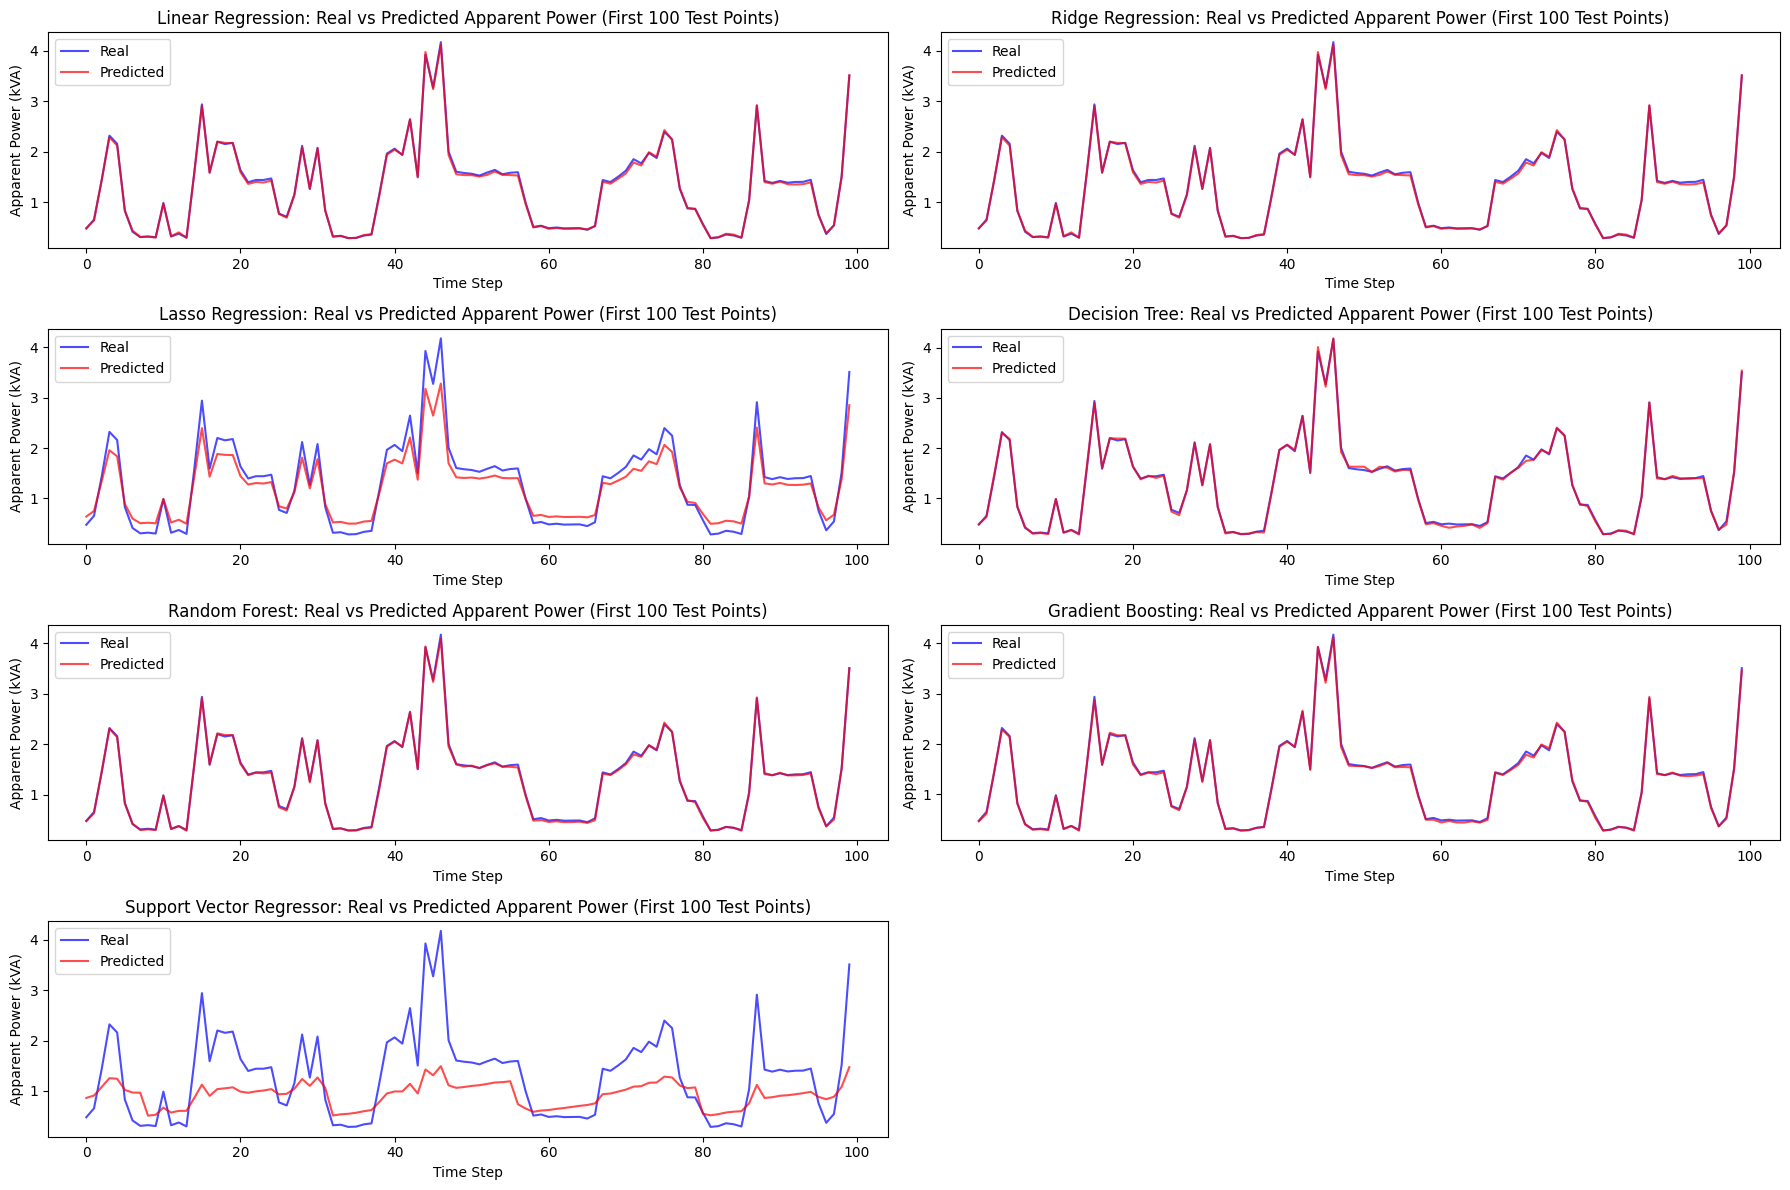

In [64]:
# Plot real vs predicted values for each model (apparent power) on the test set

model_preds_apparent = {
    "Linear Regression": y_pred_apparent,
    "Ridge Regression": y_pred_ridge_apparent,
    "Lasso Regression": y_pred_lasso_apparent,
    "Decision Tree": y_pred_dt_apparent,
    "Random Forest": y_pred_rf_apparent,
    "Gradient Boosting": y_pred_gb,
    "Support Vector Regressor": y_pred_svr_apparent
}

plt.figure(figsize=(18, 12))
for i, (name, preds) in enumerate(model_preds_apparent.items(), 1):
    plt.subplot(4, 2, i)
    plt.plot(y_test.values[:100], label='Real', color='blue', alpha=0.7)
    plt.plot(preds[:100], label='Predicted', color='red', alpha=0.7)
    plt.title(f'{name}: Real vs Predicted Apparent Power (First 100 Test Points)')
    plt.xlabel('Time Step')
    plt.ylabel('Apparent Power (kVA)')
    plt.legend()
    plt.tight_layout()
plt.show()

In [65]:
# Neural Network Model - Global Active Power

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

np.random.seed(42)

# Features and target
X_active = df[['Global_intensity', 'Day', 'Month', 'Year', 'Weekday', 'Hour', 'Is_Weekend', 'Season', 'Hour_sin', 'Hour_cos','Weekday_sin', 'Weekday_cos', 'Month_sin', 'Month_cos', 'Is_Peak_Hour']]
y_active = df['Global_active_power']

# Train-test split
from sklearn.model_selection import train_test_split
X_train_active, X_test_active, y_train_active, y_test_active = train_test_split(X_active, y_active, shuffle=False, test_size=0.2)

# Scale
scaler_active = StandardScaler()
X_train_active_scaled = scaler_active.fit_transform(X_train_active)
X_test_active_scaled = scaler_active.transform(X_test_active)

# Model
model_active = Sequential()
model_active.add(Dense(64, input_dim=X_train_active_scaled.shape[1], activation='relu'))
model_active.add(Dense(32, activation='relu'))
model_active.add(Dense(1))

model_active.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train
history_active = model_active.fit(X_train_active_scaled, y_train_active, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Predict and Evaluate
y_pred_active = model_active.predict(X_test_active_scaled)
mse_active = mean_squared_error(y_test_active, y_pred_active)
r2_active = r2_score(y_test_active, y_pred_active)

print("\nNeural Network Results (Global Active Power Only):")
print(f"MSE: {mse_active:.4f}")
print(f"R2 Score: {r2_active:.4f}")

# Save the model
model_active.save("global_active_power_model.h5")


Epoch 1/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2456 - val_loss: 0.0096
Epoch 2/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - loss: 0.0050 - val_loss: 0.0057
Epoch 3/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - loss: 0.0028 - val_loss: 0.0037
Epoch 4/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 860us/step - loss: 0.0020 - val_loss: 0.0030
Epoch 5/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step - loss: 0.0016 - val_loss: 0.0025
Epoch 6/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step - loss: 0.0013 - val_loss: 0.0025
Epoch 7/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 8/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 869us/step - loss: 0.0011 - val_loss: 0.0019
Epoch 9/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 889us/step - loss: 0.0010 - val_loss: 0.0015
Epoch 10/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 911us/step - loss: 9.3760e-04 - val_loss: 0.0013
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step



Neural Network Results (Global Active Power Only):
MSE: 0.0016
R2 Score: 0.9971


In [66]:
# Neural Network Model - Apparent Power

np.random.seed(42)

# Features and target
X_apparent = df[['Global_intensity', 'Day', 'Month', 'Year', 'Weekday', 'Hour', 'Is_Weekend', 'Season', 'Hour_sin', 'Hour_cos','Weekday_sin', 'Weekday_cos', 'Month_sin', 'Month_cos', 'Is_Peak_Hour']]
y_apparent = df['Apparent_power']

# Train-test split
X_train_apparent, X_test_apparent, y_train_apparent, y_test_apparent = train_test_split(X_apparent, y_apparent, shuffle=False, test_size=0.2)

# Scale
scaler_apparent = StandardScaler()
X_train_apparent_scaled = scaler_apparent.fit_transform(X_train_apparent)
X_test_apparent_scaled = scaler_apparent.transform(X_test_apparent)

# Model
model_apparent = Sequential()
model_apparent.add(Dense(64, input_dim=X_train_apparent_scaled.shape[1], activation='relu'))
model_apparent.add(Dense(32, activation='relu'))
model_apparent.add(Dense(1))

model_apparent.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train
history_apparent = model_apparent.fit(X_train_apparent_scaled, y_train_apparent, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Predict and Evaluate
y_pred_apparent = model_apparent.predict(X_test_apparent_scaled)
mse_apparent = mean_squared_error(y_test_apparent, y_pred_apparent)
r2_apparent = r2_score(y_test_apparent, y_pred_apparent)

print("\nNeural Network Results (Apparent Power Only):")
print(f"MSE: {mse_apparent:.4f}")
print(f"R2 Score: {r2_apparent:.4f}")

# Save the model
model_apparent.save("apparent_power_model.h5")


Epoch 1/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2962 - val_loss: 0.0096
Epoch 2/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - loss: 0.0044 - val_loss: 0.0046
Epoch 3/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - loss: 0.0025 - val_loss: 0.0037
Epoch 4/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - loss: 0.0018 - val_loss: 0.0028
Epoch 5/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - loss: 0.0014 - val_loss: 0.0020
Epoch 6/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - loss: 0.0012 - val_loss: 0.0019
Epoch 7/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - loss: 0.0010 - val_loss: 0.0014
Epoch 8/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step - loss: 8.9041e-04 - val_loss: 0.0011
Epoch 9/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.3087e-04 - val_loss: 0.0015
Epoch 10/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - loss: 8.0866e-04 - val_loss: 0.0010
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step



Neural Network Results (Apparent Power Only):
MSE: 0.0015
R2 Score: 0.9971


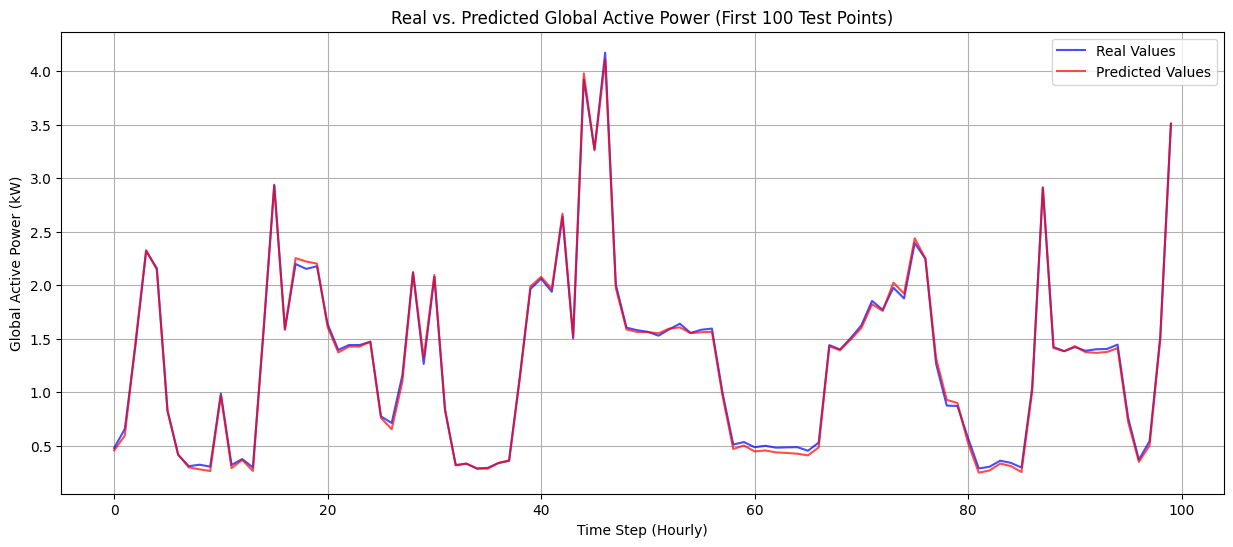

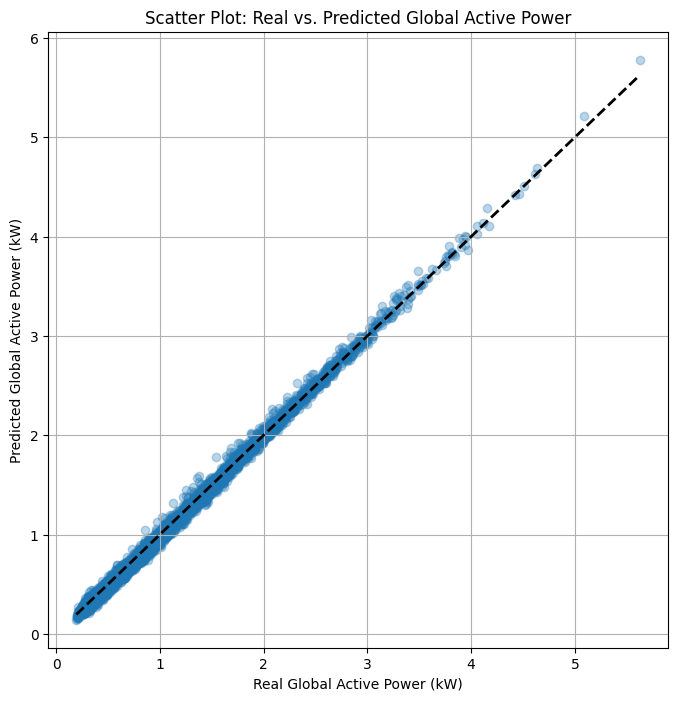

In [67]:
# Convert y_test and y_pred to numpy arrays
y_test_active_np = y_test_active.values if isinstance(y_test_active, pd.Series) else y_test_active
y_pred_active_np = y_pred_active.flatten() if isinstance(y_pred_active, np.ndarray) and y_pred_active.shape[1] == 1 else y_pred_active

# Line Plot: Real vs Predicted Global Active Power
plt.figure(figsize=(15, 6))
plt.plot(y_test_active_np[:100], label='Real Values', color='blue', alpha=0.7)
plt.plot(y_pred_active_np[:100], label='Predicted Values', color='red', alpha=0.7)
plt.title('Real vs. Predicted Global Active Power (First 100 Test Points)')
plt.xlabel('Time Step (Hourly)')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.grid(True)
plt.show()

# Scatter Plot: Real vs Predicted Global Active Power
plt.figure(figsize=(8, 8))
plt.scatter(y_test_active_np, y_pred_active_np, alpha=0.3)
plt.plot([y_test_active_np.min(), y_test_active_np.max()], [y_test_active_np.min(), y_test_active_np.max()], 'k--', lw=2)
plt.xlabel('Real Global Active Power (kW)')
plt.ylabel('Predicted Global Active Power (kW)')
plt.title('Scatter Plot: Real vs. Predicted Global Active Power')
plt.grid(True)
plt.show()


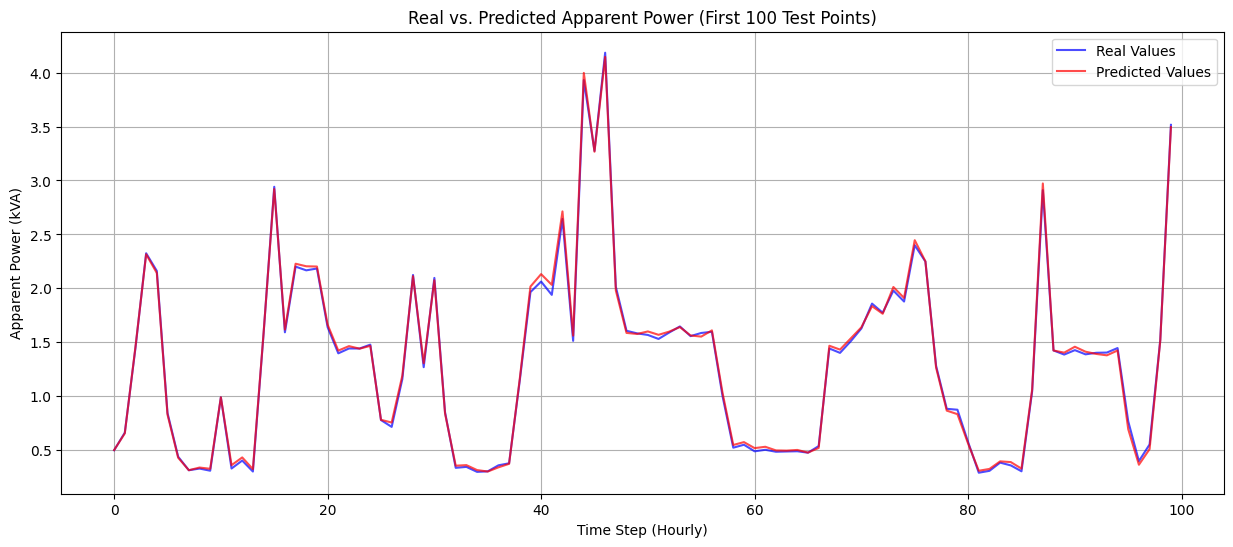

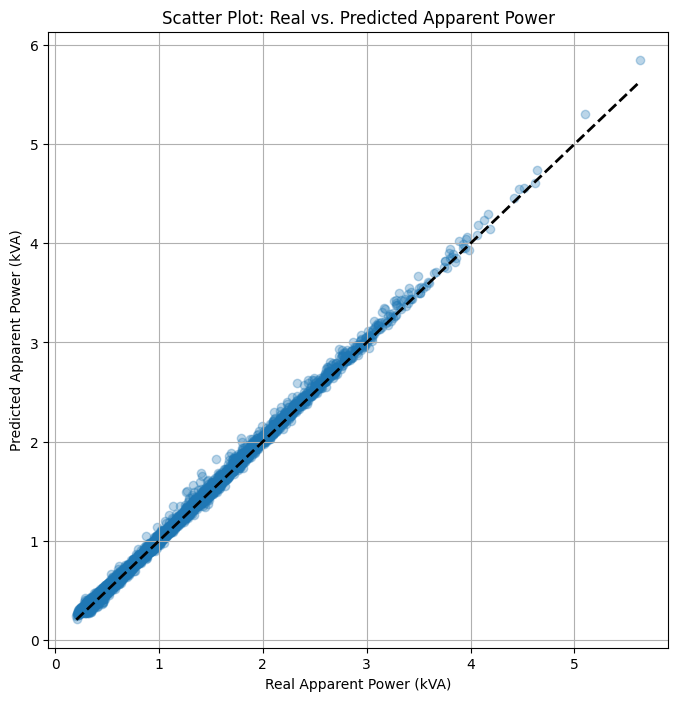

In [68]:
# Convert y_test and y_pred to numpy arrays
y_test_apparent_np = y_test_apparent.values if isinstance(y_test_apparent, pd.Series) else y_test_apparent
y_pred_apparent_np = y_pred_apparent.flatten() if isinstance(y_pred_apparent, np.ndarray) and y_pred_apparent.shape[1] == 1 else y_pred_apparent

# Line Plot: Real vs Predicted Apparent Power
plt.figure(figsize=(15, 6))
plt.plot(y_test_apparent_np[:100], label='Real Values', color='blue', alpha=0.7)
plt.plot(y_pred_apparent_np[:100], label='Predicted Values', color='red', alpha=0.7)
plt.title('Real vs. Predicted Apparent Power (First 100 Test Points)')
plt.xlabel('Time Step (Hourly)')
plt.ylabel('Apparent Power (kVA)')
plt.legend()
plt.grid(True)
plt.show()

# Scatter Plot: Real vs Predicted Apparent Power
plt.figure(figsize=(8, 8))
plt.scatter(y_test_apparent_np, y_pred_apparent_np, alpha=0.3)
plt.plot([y_test_apparent_np.min(), y_test_apparent_np.max()], [y_test_apparent_np.min(), y_test_apparent_np.max()], 'k--', lw=2)
plt.xlabel('Real Apparent Power (kVA)')
plt.ylabel('Predicted Apparent Power (kVA)')
plt.title('Scatter Plot: Real vs. Predicted Apparent Power')
plt.grid(True)
plt.show()


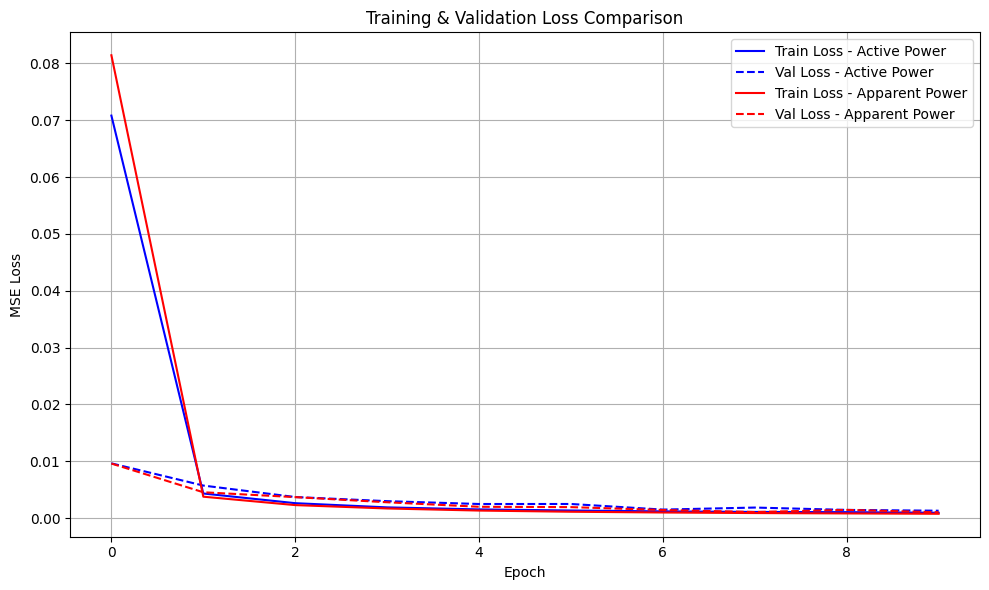

In [69]:
plt.figure(figsize=(10, 6))

# Global Active Power - Training & Validation Loss
plt.plot(history_active.history['loss'], label='Train Loss - Active Power', linestyle='-', color='blue')
plt.plot(history_active.history['val_loss'], label='Val Loss - Active Power', linestyle='--', color='blue')

# Apparent Power - Training & Validation Loss
plt.plot(history_apparent.history['loss'], label='Train Loss - Apparent Power', linestyle='-', color='red')
plt.plot(history_apparent.history['val_loss'], label='Val Loss - Apparent Power', linestyle='--', color='red')

plt.title('Training & Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [70]:
# Group by Year, Month, Day, Hour and calculate mean of Global_intensity
mean_intensity_by_time = (
    df.groupby([ 'Month', 'Day', 'Hour'])['Global_intensity']
    .mean()
    .reset_index()
    .rename(columns={'Global_intensity': 'Mean_Global_Intensity'})
)

# Display the new DataFrame
mean_intensity_by_time

,Month,Day,Hour,Mean_Global_Intensity
0,1,1,0,5.995000
1,1,1,1,5.579167
2,1,1,2,6.480833
3,1,1,3,6.675833
4,1,1,4,6.283333
...,...,...,...,...
8779,12,31,19,12.390833
8780,12,31,20,11.979167
8781,12,31,21,9.300833
8782,12,31,22,7.629167


In [71]:
# Group by Month, Day, Hour and calculate max of Global_intensity
max_intensity_by_time = (
    df.groupby(['Month', 'Day', 'Hour'])['Global_intensity']
    .max()
    .reset_index()
    .rename(columns={'Global_intensity': 'Max_Global_Intensity'})
)

# Display the new DataFrame
max_intensity_by_time

,Month,Day,Hour,Max_Global_Intensity
0,1,1,0,10.530000
1,1,1,1,10.443333
2,1,1,2,10.540000
3,1,1,3,11.223333
4,1,1,4,10.110000
...,...,...,...,...
8779,12,31,19,13.256667
8780,12,31,20,17.666667
8781,12,31,21,12.100000
8782,12,31,22,10.970000


In [72]:
# Group by Month, Day, Hour and calculate min of Global_intensity
min_intensity_by_time = (
    df.groupby(['Month', 'Day', 'Hour'])['Global_intensity']
    .min()
    .reset_index()
    .rename(columns={'Global_intensity': 'Min_Global_Intensity'})
)

# Display the new DataFrame
min_intensity_by_time

,Month,Day,Hour,Min_Global_Intensity
0,1,1,0,2.396667
1,1,1,1,2.446667
2,1,1,2,2.543333
3,1,1,3,2.373333
4,1,1,4,2.346667
...,...,...,...,...
8779,12,31,19,10.266667
8780,12,31,20,8.090000
8781,12,31,21,6.513333
8782,12,31,22,4.410000


In [73]:
# Save mean intensity
mean_intensity_by_time.to_csv("mean_intensity_by_time.csv", index=False)

# Save min intensity
min_intensity_by_time.to_csv("min_intensity_by_time.csv", index=False)

# Save max intensity
max_intensity_by_time.to_csv("max_intensity_by_time.csv", index=False)


In [76]:
# Sum Global Active Power from 2008-05-01 to 2008-06-30
total_active_power = df.loc['2008-09-01':'2008-10-31', 'Global_active_power'].sum()
print(f"Total Global Active Power from 01-05-2008 to 30-06-2008: {total_active_power:.2f} kW")

Total Global Active Power from 01-05-2008 to 30-06-2008: 1556.97 kW
